In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re 
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import spacy


[nltk_data] Error loading punkt: <urlopen error TLS/SSL connection has
[nltk_data]     been closed (EOF) (_ssl.c:1133)>
[nltk_data] Error loading stopwords: <urlopen error TLS/SSL connection
[nltk_data]     has been closed (EOF) (_ssl.c:1133)>
[nltk_data] Downloading package wordnet to /Users/hy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
chn=pd.read_csv('covid_chn.csv')
chn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3511 entries, 0 to 3510
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      3511 non-null   object
 1   Link       3511 non-null   object
 2   Date       3511 non-null   object
 3   Content    3510 non-null   object
 4   Yearmonth  3511 non-null   object
dtypes: object(5)
memory usage: 137.3+ KB


Preprocessing

In [ ]:
# Define keywords with weights
key_words = {
    "covid-19": 3, "covid": 3, "zero-covid": 2, "test": 1, "testing": 1, "case": 2, "cases": 2, 
    "control": 1, "controls": 1, "Omicron": 3, "variant": 2, "variants": 2, "quarantine": 2, 
    "nucleic": 1, "virus": 2, "anti-virus": 3, "residents": 1, "anxiety": 2, "offline": 1, 
    "online": 1, "epidemic": 3, "pandemic": 3, "anti-epidemic": 2, "vaccine": 3, "vaccinated": 3, 
    "vaccination": 3, "hospitals": 2, "hospital": 2, "Antigen": 2, "cross-border": 2, 
    "transmission": 3, "kits": 1, "fever": 1, "mobility": 1, "movement": 1, "outbreak": 3, 
    "lockdowns": 3, "lockdown": 3, "block": 1, "closed": 1, "infections": 3, "infection": 3, 
    "infectious": 2, "protection": 1, "prevention": 2, "hard-hit": 2, "tcm": 1, "mask": 2, 
    "masks": 2, "medical": 2, "treatment": 1, "practices": 1, "normal": 1, "rehabilitation": 1, 
    "containment": 2, "spread": 2, "coronavirus": 3, "Pneumonia": 1, "Wuhan": 3
}

# Set a threshold for relevance
relevance_threshold=2

def related(text):
    # Generate n-grams from text
    vectorizer=CountVectorizer(ngram_range=(1, 3), analyzer='word')
    ngram_tokens=vectorizer.build_analyzer()(text.lower())
    
    # Calculate relevance score based on keyword weights
    score=sum(key_words.get(token, 0) for token in ngram_tokens)
    
    # Check if the score meets the threshold
    return score>=relevance_threshold

# Apply the function to determine if the topic is relevant
chn['topics']=chn['Title'].apply(related)

In [5]:
chn_1=chn[chn['topics']==True]

In [6]:
chn_1.drop(['topics'], axis=1, inplace=True)

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/735572749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chn_1.drop(['topics'], axis=1, inplace=True)


In [7]:
chn_1

Title  \
0     covid treatment molnupiravir approved for impo...   
1     china allocates medical resources to ensure pe...   
2             domestic covid-19 drug effective in trial   
3              steps taken to ensure covid preparedness   
5                           q&a on covid-19 reinfection   
...                                                 ...   
3504                   chinese vaccine for hpv approved   
3506    wuhan wet market closes amid pneumonia outbreak   
3508    viral pneumonia cases reported in central china   
3509         china's 1st homegrown hpv vaccine approved   
3510         man sentenced for illegal medical practice   

                                                   Link                 Date  \
0     //www.chinadaily.com.cn/a/202212/30/WS63aee077...  2022-12-30 20:58:00   
1     //www.chinadaily.com.cn/a/202212/30/WS63ae92c7...  2022-12-30 15:26:00   
2     //www.chinadaily.com.cn/a/202212/30/WS63ae35c5...  2022-12-30 08:49:00   
3     //www.chinadaily.com.cn/a/202212/30/WS63ae1757...  2022-12-30 06:39:00   
5     //www.chinadaily.com.cn/a/202212/29/WS63ad2cd3...  2022-12-29 13:59:00   
...                                                 ...                  ...   
3504  //www.chinadaily.com.cn/a/202001/02/WS5e0d4067...  2020-01-02 08:59:00   
3506  //www.chinadaily.com.cn/a/202001/01/WS5e0c6a49...  2020-01-01 17:45:00   
3508  //www.chinadaily.com.cn/a/201912/31/WS5e0b1132...  2019-12-31 17:13:00   
3509  //www.chinadaily.com.cn/a/201912/31/WS5e0b0c55...  2019-12-31 16:52:00   
3510  //www.chinadaily.com.cn/a/201912/31/WS5e0a41be...  2019-12-31 02:28:00   

                                                Content Yearmonth  
0     China's top drug regulator said on Friday that...   2022-12  
1     BEIJING -- China is actively allocating medica...   2022-12  
2     A domestic antiviral COVID-19 pill is as effec...   2022-12  
3     China's recent shifts in COVID-19 control stra...   2022-12  
5     The more virulent Delta strain of COVID-19 is ...   2022-12  
...                                                 ...       ...  
3504  China has approved its first domestically made...   2020-01  
3506  A Central China wet market known for seafood w...   2020-01  
3508  WUHAN - The 27 pneumonia cases in Wuhan, capit...   2019-12  
3509  China's drug regulator has approved the countr...   2019-12  
3510  A researcher who claimed to have created the w...   2019-12  

[3129 rows x 5 columns]

In [8]:
nlp=spacy.load("en_core_web_sm")

In [9]:
def preprocess_content(content):
    if isinstance(content, str):
         content=content.lower()
    # Remove content after "Copyright"
         content=re.split(r'\bcopyright\b', content)[0]
         content=re.sub('<.*>', '', content)
         content=re.sub('\((.*?\))', '', content)
         content=re.sub('\[.*?\]', '', content)
         content=re.sub('[%s]' % re.escape(string.punctuation), ' ', content)
         content=re.sub('\w*\d\w*', '', content)
         content=re.sub(r'[\n\r\t]', '', content)
    # tokenization
         tokens=nltk.word_tokenize(content)
    # remove the stop words
         stop_words=set(stopwords.words('english'))
         tokens=[word for word in tokens if word.lower() not in stop_words]
    # lemmitization 
         doc=nlp(' '.join(tokens))
         tokens=[token.lemma_ for token in doc]
         return tokens
    else:
        return [] 


<>:7: DeprecationWarning: invalid escape sequence \(
<>:8: DeprecationWarning: invalid escape sequence \[
<>:10: DeprecationWarning: invalid escape sequence \w
<>:7: DeprecationWarning: invalid escape sequence \(
<>:8: DeprecationWarning: invalid escape sequence \[
<>:10: DeprecationWarning: invalid escape sequence \w
/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/430644671.py:7: DeprecationWarning: invalid escape sequence \(
  content=re.sub('\((.*?\))', '', content)
/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/430644671.py:8: DeprecationWarning: invalid escape sequence \[
  content=re.sub('\[.*?\]', '', content)
/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/430644671.py:10: DeprecationWarning: invalid escape sequence \w
  content=re.sub('\w*\d\w*', '', content)


In [10]:
chn_1['title_token']=chn_1['Title'].apply(preprocess_content)
chn_1

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3004055997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chn_1['title_token']=chn_1['Title'].apply(preprocess_content)


Title  \
0     covid treatment molnupiravir approved for impo...   
1     china allocates medical resources to ensure pe...   
2             domestic covid-19 drug effective in trial   
3              steps taken to ensure covid preparedness   
5                           q&a on covid-19 reinfection   
...                                                 ...   
3504                   chinese vaccine for hpv approved   
3506    wuhan wet market closes amid pneumonia outbreak   
3508    viral pneumonia cases reported in central china   
3509         china's 1st homegrown hpv vaccine approved   
3510         man sentenced for illegal medical practice   

                                                   Link                 Date  \
0     //www.chinadaily.com.cn/a/202212/30/WS63aee077...  2022-12-30 20:58:00   
1     //www.chinadaily.com.cn/a/202212/30/WS63ae92c7...  2022-12-30 15:26:00   
2     //www.chinadaily.com.cn/a/202212/30/WS63ae35c5...  2022-12-30 08:49:00   
3     //www.chinadaily.com.cn/a/202212/30/WS63ae1757...  2022-12-30 06:39:00   
5     //www.chinadaily.com.cn/a/202212/29/WS63ad2cd3...  2022-12-29 13:59:00   
...                                                 ...                  ...   
3504  //www.chinadaily.com.cn/a/202001/02/WS5e0d4067...  2020-01-02 08:59:00   
3506  //www.chinadaily.com.cn/a/202001/01/WS5e0c6a49...  2020-01-01 17:45:00   
3508  //www.chinadaily.com.cn/a/201912/31/WS5e0b1132...  2019-12-31 17:13:00   
3509  //www.chinadaily.com.cn/a/201912/31/WS5e0b0c55...  2019-12-31 16:52:00   
3510  //www.chinadaily.com.cn/a/201912/31/WS5e0a41be...  2019-12-31 02:28:00   

                                                Content Yearmonth  \
0     China's top drug regulator said on Friday that...   2022-12   
1     BEIJING -- China is actively allocating medica...   2022-12   
2     A domestic antiviral COVID-19 pill is as effec...   2022-12   
3     China's recent shifts in COVID-19 control stra...   2022-12   
5     The more virulent Delta strain of COVID-19 is ...   2022-12   
...                                                 ...       ...   
3504  China has approved its first domestically made...   2020-01   
3506  A Central China wet market known for seafood w...   2020-01   
3508  WUHAN - The 27 pneumonia cases in Wuhan, capit...   2019-12   
3509  China's drug regulator has approved the countr...   2019-12   
3510  A researcher who claimed to have created the w...   2019-12   

                                            title_token  
0     [covid, treatment, molnupiravir, approve, impo...  
1     [china, allocate, medical, resource, ensure, p...  
2             [domestic, covid, drug, effective, trial]  
3             [step, take, ensure, covid, preparedness]  
5                               [q, covid, reinfection]  
...                                                 ...  
3504                   [chinese, vaccine, hpv, approve]  
3506  [wuhan, wet, market, close, amid, pneumonia, o...  
3508   [viral, pneumonia, case, report, central, china]  
3509          [china, homegrown, hpv, vaccine, approve]  
3510        [man, sentence, illegal, medical, practice]  

[3129 rows x 6 columns]

In [11]:
chn_1['content_token']=chn_1['Content'].apply(preprocess_content)
chn_1

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/130726573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chn_1['content_token']=chn_1['Content'].apply(preprocess_content)


Title  \
0     covid treatment molnupiravir approved for impo...   
1     china allocates medical resources to ensure pe...   
2             domestic covid-19 drug effective in trial   
3              steps taken to ensure covid preparedness   
5                           q&a on covid-19 reinfection   
...                                                 ...   
3504                   chinese vaccine for hpv approved   
3506    wuhan wet market closes amid pneumonia outbreak   
3508    viral pneumonia cases reported in central china   
3509         china's 1st homegrown hpv vaccine approved   
3510         man sentenced for illegal medical practice   

                                                   Link                 Date  \
0     //www.chinadaily.com.cn/a/202212/30/WS63aee077...  2022-12-30 20:58:00   
1     //www.chinadaily.com.cn/a/202212/30/WS63ae92c7...  2022-12-30 15:26:00   
2     //www.chinadaily.com.cn/a/202212/30/WS63ae35c5...  2022-12-30 08:49:00   
3     //www.chinadaily.com.cn/a/202212/30/WS63ae1757...  2022-12-30 06:39:00   
5     //www.chinadaily.com.cn/a/202212/29/WS63ad2cd3...  2022-12-29 13:59:00   
...                                                 ...                  ...   
3504  //www.chinadaily.com.cn/a/202001/02/WS5e0d4067...  2020-01-02 08:59:00   
3506  //www.chinadaily.com.cn/a/202001/01/WS5e0c6a49...  2020-01-01 17:45:00   
3508  //www.chinadaily.com.cn/a/201912/31/WS5e0b1132...  2019-12-31 17:13:00   
3509  //www.chinadaily.com.cn/a/201912/31/WS5e0b0c55...  2019-12-31 16:52:00   
3510  //www.chinadaily.com.cn/a/201912/31/WS5e0a41be...  2019-12-31 02:28:00   

                                                Content Yearmonth  \
0     China's top drug regulator said on Friday that...   2022-12   
1     BEIJING -- China is actively allocating medica...   2022-12   
2     A domestic antiviral COVID-19 pill is as effec...   2022-12   
3     China's recent shifts in COVID-19 control stra...   2022-12   
5     The more virulent Delta strain of COVID-19 is ...   2022-12   
...                                                 ...       ...   
3504  China has approved its first domestically made...   2020-01   
3506  A Central China wet market known for seafood w...   2020-01   
3508  WUHAN - The 27 pneumonia cases in Wuhan, capit...   2019-12   
3509  China's drug regulator has approved the countr...   2019-12   
3510  A researcher who claimed to have created the w...   2019-12   

                                            title_token  \
0     [covid, treatment, molnupiravir, approve, impo...   
1     [china, allocate, medical, resource, ensure, p...   
2             [domestic, covid, drug, effective, trial]   
3             [step, take, ensure, covid, preparedness]   
5                               [q, covid, reinfection]   
...                                                 ...   
3504                   [chinese, vaccine, hpv, approve]   
3506  [wuhan, wet, market, close, amid, pneumonia, o...   
3508   [viral, pneumonia, case, report, central, china]   
3509          [china, homegrown, hpv, vaccine, approve]   
3510        [man, sentence, illegal, medical, practice]   

                                          content_token  
0     [china, top, drug, regulator, say, friday, gra...  
1     [beijing, china, actively, allocate, medical, ...  
2     [domestic, antiviral, covid, pill, effective, ...  
3     [china, recent, shift, covid, control, strateg...  
5     [virulent, delta, strain, covid, currently, ci...  
...                                                 ...  
3504  [china, approve, first, domestically, make, va...  
3506  [central, china, wet, market, know, seafood, c...  
3508  [wuhan, pneumonia, case, wuhan, capital, centr...  
3509  [china, drug, regulator, approve, country, fir...  
3510  [researcher, claim, create, world, first, gene...  

[3129 rows x 7 columns]

In [12]:
chn_1.to_csv("chn_withintokens.csv", index=False)

In [13]:
from gensim import corpora

In [14]:
title_dict=corpora.Dictionary(chn_1['title_token'])
title_corpus=[title_dict.doc2bow(text) for text in chn_1['title_token']]

In [15]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from sklearn.model_selection import GridSearchCV

In [17]:
class LdaTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_topics=10, alpha='symmetric', eta='symmetric', passes=10, random_state=100):
        self.num_topics = num_topics
        self.alpha = alpha
        self.eta = eta
        self.passes = passes
        self.random_state = random_state
        self.model = None
        
    def fit(self, X, y=None):
        self.model = LdaModel(corpus=X, num_topics=self.num_topics, id2word=title_dict,
                              passes=self.passes, alpha=self.alpha, eta=self.eta,
                              random_state=self.random_state)
        return self
    
    def transform(self, X):
        return self.model[X]
    
    def score(self, X, y=None):
        return -self.model.log_perplexity(X) 

In [18]:
params={
    'num_topics': [7, 8, 10],
    'alpha': [0.1, 0.2, 0.5],
    'eta': [0.1, 0.3, 0.5]
}

# Initialize the LDA model wrapper
lda_estimator=LdaTransformer(passes=10, random_state=100)

# Set up GridSearchCV
gridsearch=GridSearchCV(estimator=lda_estimator, param_grid=params, cv=5)

# Perform grid search on the corpus
gridsearch.fit(title_corpus)

KeyboardInterrupt: 

In [ ]:
# Get the best LDA model
best_lda_model=gridsearch.best_estimator_.model

# Get the best parameters
best_params=gridsearch.best_params_

# Print the results
print("Best Model's Parameters:", best_params)
print("Best Model's Log Perplexity:", -gridsearch.best_score_)

Best Model's Parameters: {'alpha': 0.1, 'eta': 0.1, 'num_topics': 10}
Best Model's Log Perplexity: -8.900485121034794


In [20]:
import gensim

In [21]:
# Function to evaluate for different number of topics
def evaluations(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values=[]
    perplexity_values=[]
    model_list=[]
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                                id2word=dictionary, 
                                                num_topics=num_topics, 
                                                random_state=100,
                                                passes=10,
                                                alpha=0.1, 
                                                eta=0.1)
        model_list.append(model)
        coherencemodel=CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(model.log_perplexity(title_corpus))
    return model_list, coherence_values, perplexity_values

# Running the function
model_list, coherence_values,perplexity_values=evaluations(dictionary=title_dict, corpus=title_corpus, texts=chn_1['title_token'], start=2, limit=14, step=1)

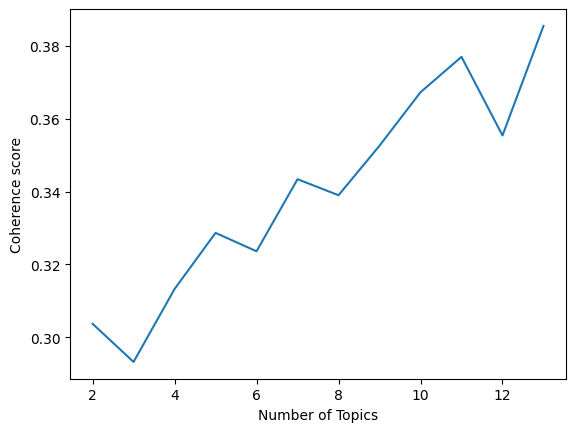

In [22]:
x = range(2, 14, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.show()

In [23]:
coherence_values

[0.30371855985819607,
 0.29324814498202656,
 0.3132580215941595,
 0.32866683891522813,
 0.3236196429248737,
 0.34340010956144057,
 0.3390036554559047,
 0.35260481715520636,
 0.36727605139916814,
 0.37698921761071114,
 0.3554096960438415,
 0.38547723122169575]

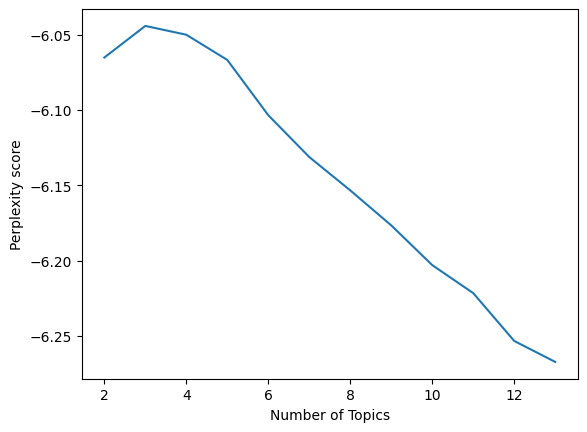

In [24]:
x = range(2, 14, 1)
plt.plot(x, perplexity_values)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity score")
plt.show()

In [25]:
# Perform the final model of LDA topic modeling
chn_tm_lda=gensim.models.ldamodel.LdaModel(title_corpus, 
                                           num_topics=10, 
                                           id2word=title_dict,
                                           random_state=100,
                                           passes=10,
                                           alpha=0.1, 
                                           eta=0.1)

# Display the topics
topics=chn_tm_lda.print_topics(num_words=15)
for topic in topics:
    print(topic)

(0, '0.161*"case" + 0.125*"new" + 0.112*"covid" + 0.106*"report" + 0.068*"mainland" + 0.062*"chinese" + 0.049*"confirm" + 0.040*"local" + 0.024*"transmit" + 0.023*"locally" + 0.019*"import" + 0.017*"shanghai" + 0.016*"asymptomatic" + 0.013*"beijing" + 0.009*"infection"')
(1, '0.097*"coronavirus" + 0.062*"novel" + 0.040*"virus" + 0.026*"shanghai" + 0.025*"wuhan" + 0.022*"pneumonia" + 0.019*"beijing" + 0.016*"covid" + 0.015*"aid" + 0.013*"transmission" + 0.013*"fight" + 0.012*"first" + 0.012*"death" + 0.011*"two" + 0.011*"response"')
(2, '0.060*"covid" + 0.037*"say" + 0.037*"medical" + 0.025*"china" + 0.023*"health" + 0.023*"official" + 0.018*"work" + 0.017*"vaccination" + 0.016*"expert" + 0.013*"virus" + 0.012*"group" + 0.009*"across" + 0.009*"link" + 0.009*"urge" + 0.009*"cure"')
(3, '0.063*"covid" + 0.046*"testing" + 0.027*"beijing" + 0.024*"city" + 0.018*"continue" + 0.018*"case" + 0.016*"hospital" + 0.016*"china" + 0.016*"infection" + 0.014*"acid" + 0.014*"nucleic" + 0.012*"mass" + 

In [26]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# 创建可视化
vis_data=gensimvis.prepare(chn_tm_lda, title_corpus, title_dict)
pyLDAvis.display(vis_data)

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns

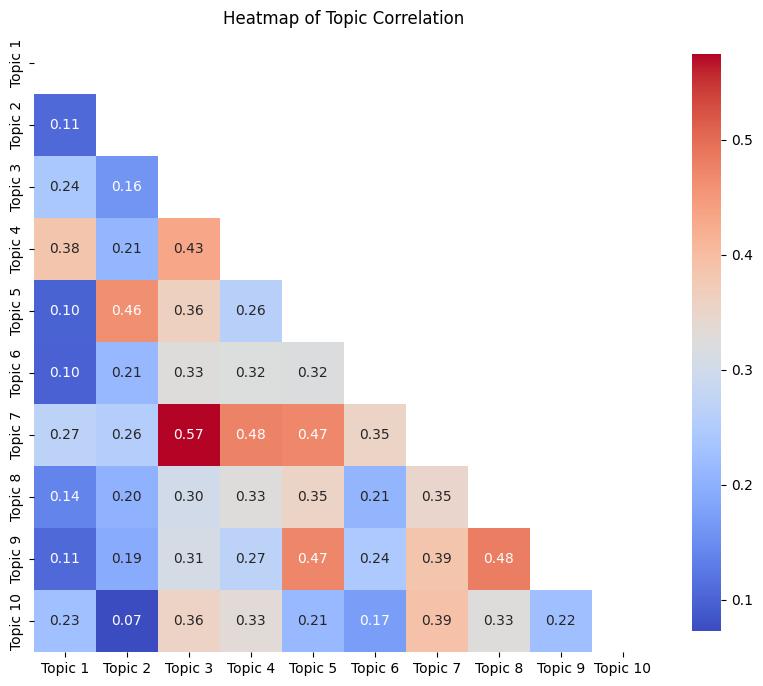

In [28]:
topic_vectors = []
for topic in chn_tm_lda.show_topics(formatted=False, num_words=len(title_dict.keys())):
    vector=np.zeros(len(title_dict))  # Initialize vector of zeros
    for word, weight in topic[1]:  # Assuming topic[1] is a list of (word, weight) tuples
        word_id = title_dict.token2id[word]
        vector[word_id] = weight
    topic_vectors.append(vector)

# Convert to numpy array and the similarity_matrix
topic_vectors=np.array(topic_vectors)
similarity_matrix=cosine_similarity(topic_vectors)
mask=np.triu(np.ones_like(similarity_matrix,dtype=bool))
num_topics=similarity_matrix.shape[0]
labels=[f'Topic {i+1}' for i in range(num_topics)]

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',square=True, cbar_kws={"shrink": 0.75},xticklabels=labels, yticklabels=labels)
plt.title("Heatmap of Topic Correlation")
plt.show()

In [29]:
#assign the probability to every row
def topic_with_prob(lda_model, corpus):
    topics=[]
    prob=[]
    
    for doc in corpus:
        topic_prob=lda_model.get_document_topics(doc)
        # Find the topic with the highest probability
        dominant_topic, dominant_prob=max(topic_prob, key=lambda x: x[1])
        topics.append(dominant_topic)
        prob.append(dominant_prob)
    
    return topics, prob

# Apply the function to get topics and probabilities
chn_1['Topic'], chn_1['Topic_Prob']=topic_with_prob(chn_tm_lda, title_corpus)

# Display the dataframe to see the added columns
chn_1

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3975579296.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chn_1['Topic'], chn_1['Topic_Prob']=topic_with_prob(chn_tm_lda, title_corpus)
/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3975579296.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chn_1['Topic'], chn_1['Topic_Prob']=topic_with_prob(chn_tm_lda, title_corpus)


Title  \
0     covid treatment molnupiravir approved for impo...   
1     china allocates medical resources to ensure pe...   
2             domestic covid-19 drug effective in trial   
3              steps taken to ensure covid preparedness   
5                           q&a on covid-19 reinfection   
...                                                 ...   
3504                   chinese vaccine for hpv approved   
3506    wuhan wet market closes amid pneumonia outbreak   
3508    viral pneumonia cases reported in central china   
3509         china's 1st homegrown hpv vaccine approved   
3510         man sentenced for illegal medical practice   

                                                   Link                 Date  \
0     //www.chinadaily.com.cn/a/202212/30/WS63aee077...  2022-12-30 20:58:00   
1     //www.chinadaily.com.cn/a/202212/30/WS63ae92c7...  2022-12-30 15:26:00   
2     //www.chinadaily.com.cn/a/202212/30/WS63ae35c5...  2022-12-30 08:49:00   
3     //www.chinadaily.com.cn/a/202212/30/WS63ae1757...  2022-12-30 06:39:00   
5     //www.chinadaily.com.cn/a/202212/29/WS63ad2cd3...  2022-12-29 13:59:00   
...                                                 ...                  ...   
3504  //www.chinadaily.com.cn/a/202001/02/WS5e0d4067...  2020-01-02 08:59:00   
3506  //www.chinadaily.com.cn/a/202001/01/WS5e0c6a49...  2020-01-01 17:45:00   
3508  //www.chinadaily.com.cn/a/201912/31/WS5e0b1132...  2019-12-31 17:13:00   
3509  //www.chinadaily.com.cn/a/201912/31/WS5e0b0c55...  2019-12-31 16:52:00   
3510  //www.chinadaily.com.cn/a/201912/31/WS5e0a41be...  2019-12-31 02:28:00   

                                                Content Yearmonth  \
0     China's top drug regulator said on Friday that...   2022-12   
1     BEIJING -- China is actively allocating medica...   2022-12   
2     A domestic antiviral COVID-19 pill is as effec...   2022-12   
3     China's recent shifts in COVID-19 control stra...   2022-12   
5     The more virulent Delta strain of COVID-19 is ...   2022-12   
...                                                 ...       ...   
3504  China has approved its first domestically made...   2020-01   
3506  A Central China wet market known for seafood w...   2020-01   
3508  WUHAN - The 27 pneumonia cases in Wuhan, capit...   2019-12   
3509  China's drug regulator has approved the countr...   2019-12   
3510  A researcher who claimed to have created the w...   2019-12   

                                            title_token  \
0     [covid, treatment, molnupiravir, approve, impo...   
1     [china, allocate, medical, resource, ensure, p...   
2             [domestic, covid, drug, effective, trial]   
3             [step, take, ensure, covid, preparedness]   
5                               [q, covid, reinfection]   
...                                                 ...   
3504                   [chinese, vaccine, hpv, approve]   
3506  [wuhan, wet, market, close, amid, pneumonia, o...   
3508   [viral, pneumonia, case, report, central, china]   
3509          [china, homegrown, hpv, vaccine, approve]   
3510        [man, sentence, illegal, medical, practice]   

                                          content_token  Topic  Topic_Prob  
0     [china, top, drug, regulator, say, friday, gra...      9    0.683620  
1     [beijing, china, actively, allocate, medical, ...      6    0.657584  
2     [domestic, antiviral, covid, pill, effective, ...      9    0.660421  
3     [china, recent, shift, covid, control, strateg...      1    0.575882  
5     [virulent, delta, strain, covid, currently, ci...      2    0.774970  
...                                                 ...    ...         ...  
3504  [china, approve, first, domestically, make, va...      9    0.819992  
3506  [central, china, wet, market, know, seafood, c...      8    0.612859  
3508  [wuhan, pneumonia, case, wuhan, capital, centr...      8    0.564920  
3509  [china, drug, regulator, approve, country, fir...      9    0.6734

In [30]:
chn_1['Yearmonth'] = pd.to_datetime(chn_1['Yearmonth'], format='%Y-%m')

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/197575979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chn_1['Yearmonth'] = pd.to_datetime(chn_1['Yearmonth'], format='%Y-%m')


/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/1507924054.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chn_1['topic_distribution']=chn_1['title_token'].apply(get_topic_distribution)
/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/1507924054.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chn_1[topic_columns]=pd.DataFrame(chn_1['topic_distribution'].tolist(), index=chn_1.index)
/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/1507924054.py:13: Se

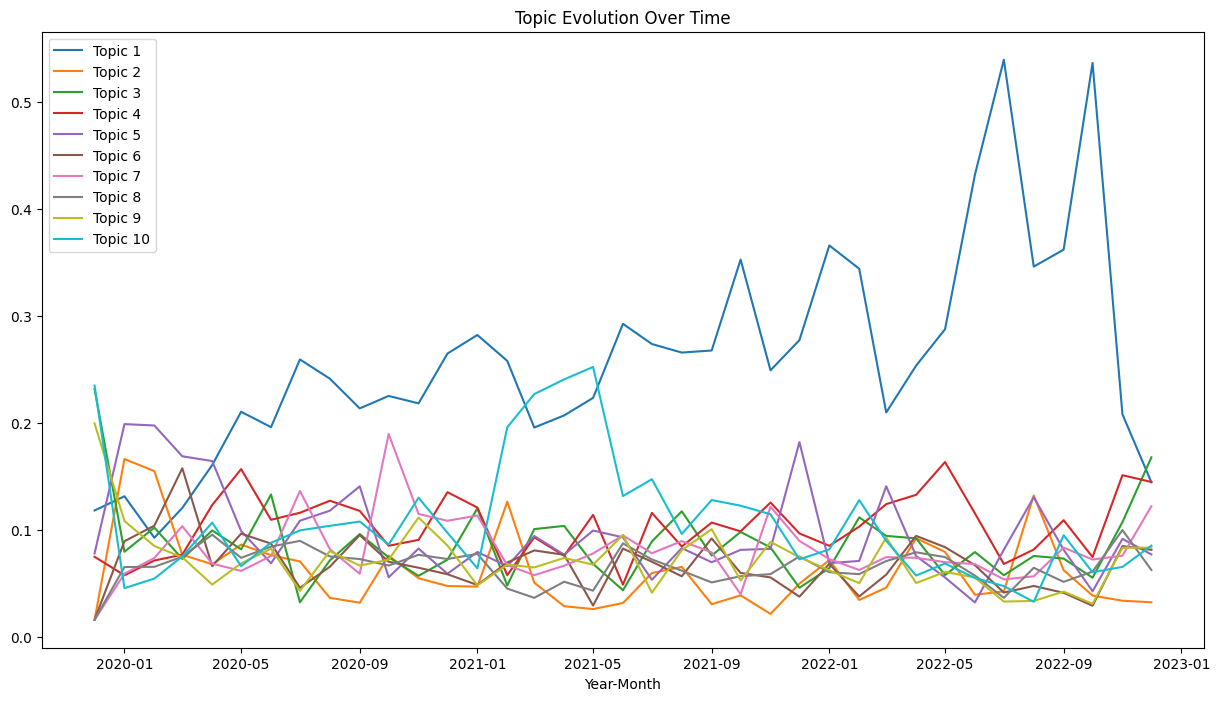

In [31]:

# Function to get topic distribution for each document
def get_topic_distribution(text):
    bow = title_dict.doc2bow(text)
    topic_dist=chn_tm_lda.get_document_topics(bow, minimum_probability=0.0)
    topic_dist=[prob for _, prob in topic_dist]  # Extract probabilities
    return topic_dist

# Apply to all documents
chn_1['topic_distribution']=chn_1['title_token'].apply(get_topic_distribution)

# Expand topic distributions into separate columns
topic_columns=[f'Topic_{i}' for i in range(chn_tm_lda.num_topics)]
chn_1[topic_columns]=pd.DataFrame(chn_1['topic_distribution'].tolist(), index=chn_1.index)

# Group by 'Yearmonth' and calculate the mean topic distribution for each month
topic_evolution=chn_1.groupby('Yearmonth')[topic_columns].mean()

# Plot the topic trends over time
plt.figure(figsize=(15, 8))
for topic in topic_evolution.columns:
    # Extract the topic number from the column name
    topic_number=topic.split('_')[1]  # Extract the number part from 'Topic_0'
    plt.plot(topic_evolution.index, topic_evolution[topic], label=f'Topic {int(topic_number) + 1}')

plt.title('Topic Evolution Over Time')
plt.xlabel('Year-Month')
plt.legend(loc='upper left')
plt.show()

In [32]:
chn_1['Topic'].value_counts()

Topic
0    823
3    351
4    341
9    312
2    266
6    229
5    214
8    206
1    194
7    193
Name: count, dtype: int64

In [33]:
word_freq_title=title_dict.dfs
freq_chn_title=[(title_dict[id], freq) for id, freq in word_freq_title.items()]
freq_chn_title=pd.DataFrame(freq_chn_title, columns=['Word', 'Frequency'])
freq_chn_title.sort_values(by='Frequency', ascending=False, inplace=True)

In [34]:
freq_chn_title_20=freq_chn_title.head(20)
freq_chn_title_20

Word  Frequency
0           covid       1502
140          case        937
170           new        713
169        report        644
72        chinese        497
5           china        442
168      mainland        436
54          virus        382
102       vaccine        300
171         local        291
172       confirm        291
85       shanghai        241
22        beijing        220
1116  coronavirus        181
7         medical        173
64       outbreak        173
89      infection        147
24       hospital        147
544      transmit        145
543       locally        142

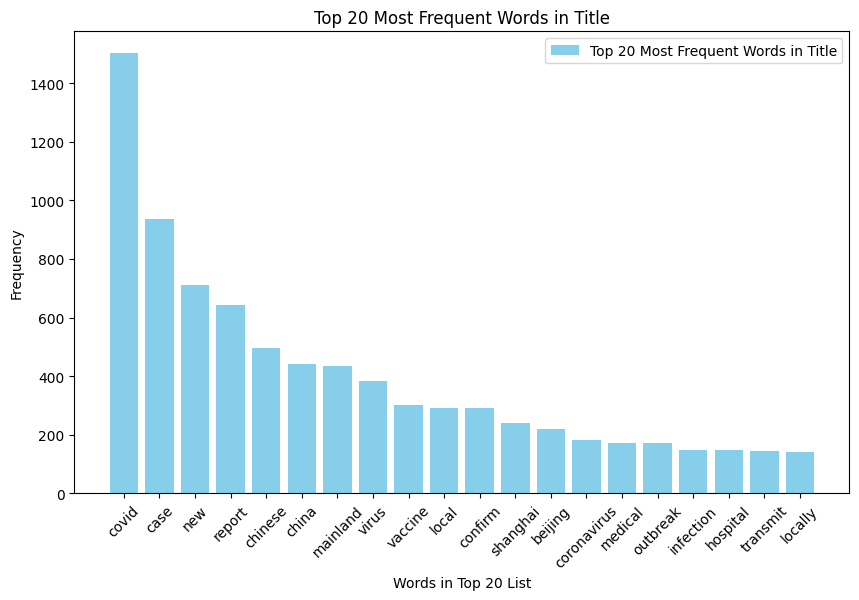

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(freq_chn_title_20['Word'], freq_chn_title_20['Frequency'], color='skyblue')

# Adding labels and title
plt.xlabel("Words in Top 20 List")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Title")
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.legend(["Top 20 Most Frequent Words in Title"], loc='best')

# Display the plot
plt.show()

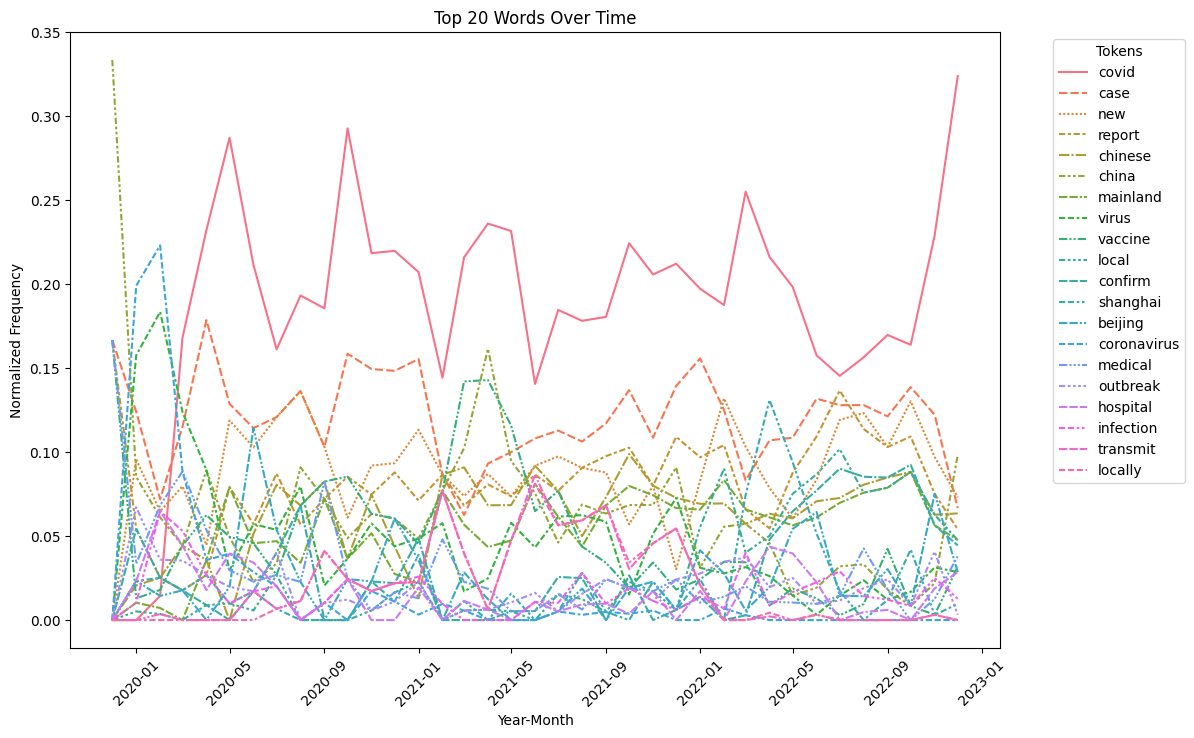

In [36]:
# Explode the tokens list so each token has its own row
chn_exploded=chn_1.explode('title_token')
token_counts=chn_exploded.groupby(['Yearmonth', 'title_token']).size().reset_index(name='count')
token_pivot=token_counts.pivot(index='Yearmonth', columns='title_token', values='count').fillna(0)
top_tokens=token_pivot.sum().sort_values(ascending=False).head(20).index
token_pivot_top=token_pivot[top_tokens]
token_pivot_top_normalized=token_pivot_top.div(token_pivot_top.sum(axis=1), axis=0)

# Plotting the top 20 tokens over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=token_pivot_top_normalized)
plt.title('Top 20 Words Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Normalized Frequency')
plt.legend(title='Tokens', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [37]:
from wordcloud import WordCloud

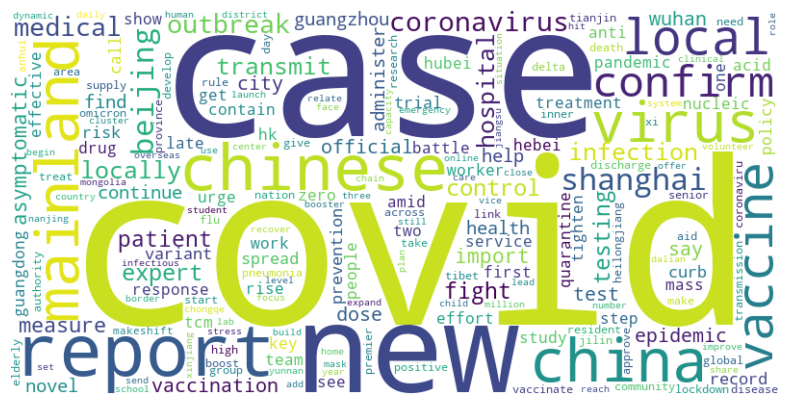

In [38]:
freq_chn_title_dict=pd.Series(freq_chn_title.Frequency.values, index=freq_chn_title.Word).to_dict()
# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(freq_chn_title_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
chn_1.head(10)

Title  \
0   covid treatment molnupiravir approved for impo...   
1   china allocates medical resources to ensure pe...   
2           domestic covid-19 drug effective in trial   
3            steps taken to ensure covid preparedness   
5                         q&a on covid-19 reinfection   
6             beijing enhancing its hospital capacity   
8   hong kong to lift social distancing measures, ...   
9   china releases details of covid-19 management ...   
10     hospitals scramble to cope with elderly influx   
11     testing no longer used for hospital admittance   

                                                 Link                 Date  \
0   //www.chinadaily.com.cn/a/202212/30/WS63aee077...  2022-12-30 20:58:00   
1   //www.chinadaily.com.cn/a/202212/30/WS63ae92c7...  2022-12-30 15:26:00   
2   //www.chinadaily.com.cn/a/202212/30/WS63ae35c5...  2022-12-30 08:49:00   
3   //www.chinadaily.com.cn/a/202212/30/WS63ae1757...  2022-12-30 06:39:00   
5   //www.chinadaily.com.cn/a/202212/29/WS63ad2cd3...  2022-12-29 13:59:00   
6   //www.chinadaily.com.cn/a/202212/29/WS63accedf...  2022-12-29 07:18:00   
8   //www.chinadaily.com.cn/a/202212/28/WS63ac620e...  2022-12-28 23:34:00   
9   //www.chinadaily.com.cn/a/202212/28/WS63abcdff...  2022-12-28 13:02:00   
10  //www.chinadaily.com.cn/a/202212/28/WS63ab94ea...  2022-12-28 08:58:00   
11  //www.chinadaily.com.cn/a/202212/28/WS63ab921d...  2022-12-28 08:46:00   

                                              Content  Yearmonth  \
0   China's top drug regulator said on Friday that... 2022-12-01   
1   BEIJING -- China is actively allocating medica... 2022-12-01   
2   A domestic antiviral COVID-19 pill is as effec... 2022-12-01   
3   China's recent shifts in COVID-19 control stra... 2022-12-01   
5   The more virulent Delta strain of COVID-19 is ... 2022-12-01   
6   As COVID-19 cases continue to increase in the ... 2022-12-01   
8   HONG KONG -- John Lee, chief executive of Chin... 2022-12-01   
9   BEIJING -- China has announced that it will be... 2022-12-01   
10  Fever clinics and emergency rooms in Beijing a... 2022-12-01   
11  Nation gearing up fever clinics, ICUs, drug pr... 2022-12-01   

                                          title_token  \
0   [covid, treatment, molnupiravir, approve, impo...   
1   [china, allocate, medical, resource, ensure, p...   
2           [domestic, covid, drug, effective, trial]   
3           [step, take, ensure, covid, preparedness]   
5                             [q, covid, reinfection]   
6              [beijing, enhance, hospital, capacity]   
8   [hong, kong, lift, social, distancing, measure...   
9   [china, release, detail, covid, management, sh...   
10        [hospital, scramble, cope, elderly, influx]   
11            [test, long, use, hospital, admittance]   

                                        content_token  Topic  Topic_Prob  \
0   [china, top, drug, regulator, say, friday, gra...      9    0.683620   
1   [beijing, china, actively, allocate, medical, ...      6    0.657584   
2   [domestic, antiviral, covid, pill, effective, ...      9    0.660421   
3   [china, recent, shift, covid, control, strateg...      1    0.575882   
5   [virulent, delta, strain, covid, currently, ci...      2    0.774970   
6   [covid, case, continue, increase, capital, bei...      3    0.574915   
8   [hong, kong, john, lee, chief, executive, chin...      3    0.563128   
9   [beijing, china, announce, downgrade, manageme...      6    0.689968   
10  [fever, clinic, emergency, room, beijing, raci...      5    0.849961   
11  [nation, gear, fever, clinic, icus, drug, prod...      3    0.514014   

                                   topic_distribution   Topic_0   Topic_1  \
0   [0.01430358, 0.014293902, 0.014295524, 0.01429...  0.014304  0.014294   
1   [0.011112004, 0.011112177, 0.25364262, 0.01111...  0.011112  0.011112   
2   [0.016670207, 0.016668864, 0.016676314, 0.2062...  0.016670  0.016669   
3   [0.016675044, 0.5758324, 0.01667631

In [40]:
chn_1['Topic']+=1
chn_1

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3471980623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chn_1['Topic']+=1


Title  \
0     covid treatment molnupiravir approved for impo...   
1     china allocates medical resources to ensure pe...   
2             domestic covid-19 drug effective in trial   
3              steps taken to ensure covid preparedness   
5                           q&a on covid-19 reinfection   
...                                                 ...   
3504                   chinese vaccine for hpv approved   
3506    wuhan wet market closes amid pneumonia outbreak   
3508    viral pneumonia cases reported in central china   
3509         china's 1st homegrown hpv vaccine approved   
3510         man sentenced for illegal medical practice   

                                                   Link                 Date  \
0     //www.chinadaily.com.cn/a/202212/30/WS63aee077...  2022-12-30 20:58:00   
1     //www.chinadaily.com.cn/a/202212/30/WS63ae92c7...  2022-12-30 15:26:00   
2     //www.chinadaily.com.cn/a/202212/30/WS63ae35c5...  2022-12-30 08:49:00   
3     //www.chinadaily.com.cn/a/202212/30/WS63ae1757...  2022-12-30 06:39:00   
5     //www.chinadaily.com.cn/a/202212/29/WS63ad2cd3...  2022-12-29 13:59:00   
...                                                 ...                  ...   
3504  //www.chinadaily.com.cn/a/202001/02/WS5e0d4067...  2020-01-02 08:59:00   
3506  //www.chinadaily.com.cn/a/202001/01/WS5e0c6a49...  2020-01-01 17:45:00   
3508  //www.chinadaily.com.cn/a/201912/31/WS5e0b1132...  2019-12-31 17:13:00   
3509  //www.chinadaily.com.cn/a/201912/31/WS5e0b0c55...  2019-12-31 16:52:00   
3510  //www.chinadaily.com.cn/a/201912/31/WS5e0a41be...  2019-12-31 02:28:00   

                                                Content  Yearmonth  \
0     China's top drug regulator said on Friday that... 2022-12-01   
1     BEIJING -- China is actively allocating medica... 2022-12-01   
2     A domestic antiviral COVID-19 pill is as effec... 2022-12-01   
3     China's recent shifts in COVID-19 control stra... 2022-12-01   
5     The more virulent Delta strain of COVID-19 is ... 2022-12-01   
...                                                 ...        ...   
3504  China has approved its first domestically made... 2020-01-01   
3506  A Central China wet market known for seafood w... 2020-01-01   
3508  WUHAN - The 27 pneumonia cases in Wuhan, capit... 2019-12-01   
3509  China's drug regulator has approved the countr... 2019-12-01   
3510  A researcher who claimed to have created the w... 2019-12-01   

                                            title_token  \
0     [covid, treatment, molnupiravir, approve, impo...   
1     [china, allocate, medical, resource, ensure, p...   
2             [domestic, covid, drug, effective, trial]   
3             [step, take, ensure, covid, preparedness]   
5                               [q, covid, reinfection]   
...                                                 ...   
3504                   [chinese, vaccine, hpv, approve]   
3506  [wuhan, wet, market, close, amid, pneumonia, o...   
3508   [viral, pneumonia, case, report, central, china]   
3509          [china, homegrown, hpv, vaccine, approve]   
3510        [man, sentence, illegal, medical, practice]   

                                          content_token  Topic  Topic_Prob  \
0     [china, top, drug, regulator, say, friday, gra...     10    0.683620   
1     [beijing, china, actively, allocate, medical, ...      7    0.657584   
2     [domestic, antiviral, covid, pill, effective, ...     10    0.660421   
3     [china, recent, shift, covid, control, strateg...      2    0.575882   
5     [virulent, delta, strain, covid, currently, ci...      3    0.774970   
...                                                 ...    ...         ...   
3504  [china, approve, first, domestically, make, va...     10    0.819992   
3506  [central, china, wet, market, know, seafood, c...      9    0.612859   
3508  [wuhan, pneumonia, case, wuhan, capital, centr...      9    0.564920   
3509  [china, drug, regulator, approve, country, f

In [41]:
#separate the topics
chn_topic={}
for topic, group in chn_1.groupby('Topic'):
    chn_topic[topic]=group
for topic, df in chn_topic.items():
    print(f"DataFrame for Topic {topic}:")
    print(df)
    print("-" * 40)

DataFrame for Topic 1:
                                                  Title  \
25       shanghai clinics deal with surge in infections   
40    multiple factors cause rise of severe covid ca...   
47    fact check: china wasted three years in covid ...   
50    chinese mainland reports 3,049 new local confi...   
57    chinese mainland reports 2,656 new local confi...   
...                                                 ...   
3465           guangdong confirms 13 new cases of virus   
3468             shanghai confirms second case of virus   
3483        two new pneumonia cases reported in beijing   
3484               wuhan reports 17 new pneumonia cases   
3499                pneumonia cases could rise in wuhan   

                                                   Link                 Date  \
25    //www.chinadaily.com.cn/a/202212/27/WS63aa4919...  2022-12-27 09:23:00   
40    //www.chinadaily.com.cn/a/202212/23/WS63a56484...  2022-12-23 16:18:00   
47    //www.chinadaily.com.c

In [42]:
from collections import defaultdict


In [43]:
nrc_lexicon = pd.read_csv('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', 
                          names=["word", "emotion", "association"], 
                          sep="\t")

{'anger': 84, 'anticipation': 120, 'disgust': 50, 'fear': 133, 'joy': 70, 'negative': 220, 'positive': 297, 'sadness': 88, 'surprise': 43, 'trust': 171}


/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/1839342858.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions',y='Score', data=title_emo,palette="muted")


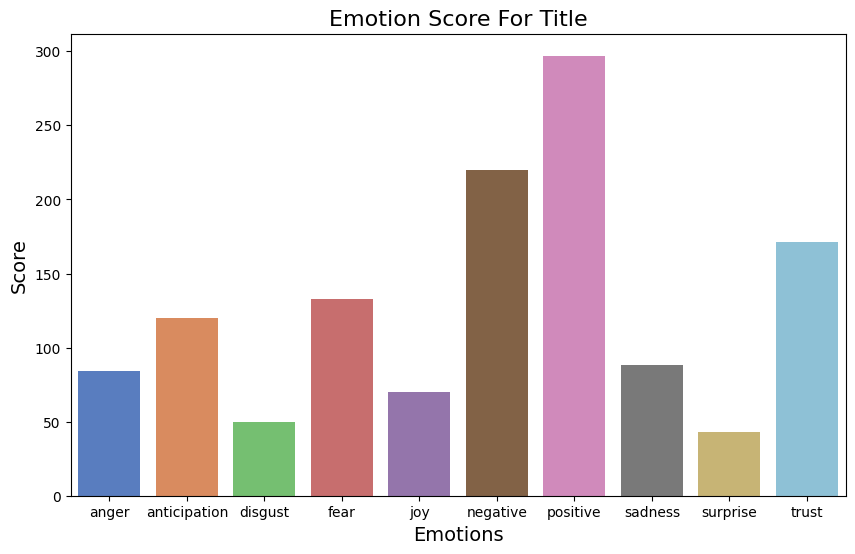

In [44]:
# for the title
title_dict=corpora.Dictionary(chn_1['title_token'])
title_words = [title_dict[id] for id in title_dict.keys()]

emotion_dict=defaultdict(lambda: defaultdict(int))
for i, row in nrc_lexicon.iterrows():
    emotion_dict[row['word']][row['emotion']] = int(row['association'])
emotion_scores=defaultdict(int)
for word in title_words:
    for emotion in emotion_dict[word]:
        emotion_scores[emotion]+=emotion_dict[word][emotion]
print(dict(emotion_scores))

title_emo=pd.DataFrame(list(emotion_scores.items()),columns=['Emotions','Score'])

plt.figure(figsize=(10,6))
sns.barplot(x='Emotions',y='Score', data=title_emo,palette="muted")
plt.title('Emotion Score For Title', fontsize=16)
plt.xlabel('Emotions',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.show()

In [76]:
# create the pipepline to apply to all topic dataframe
class TextAnalysisPipeline:
    def __init__(self, topic_dataframes, n_topics=5, nrc_lexicon_file='NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'):
        self.topic_dataframes=topic_dataframes
        self.n_topics=n_topics
        
        # Load and prepare the NRC Lexicon
        self.nrc_lexicon=pd.read_csv(nrc_lexicon_file, names=["word", "emotion", "association"], sep="\t")
        self.emotion_dict=defaultdict(lambda: defaultdict(int))
        for i, row in self.nrc_lexicon.iterrows():
            self.emotion_dict[row['word']][row['emotion']] = int(row['association'])
        
       # for different topics
        self.topic_models={}
        self.topic_dicts={}
        self.topic_corpora={}

        # Prepare topic modeling components
        for idx, topic_data in enumerate(self.topic_dataframes):
            topic_dict=corpora.Dictionary(topic_data['content_token'])
            topic_corpus=[topic_dict.doc2bow(text) for text in topic_data['content_token']]
            topic_lda=gensim.models.ldamodel.LdaModel(topic_corpus, 
                                                        num_topics=self.n_topics, 
                                                        id2word=topic_dict,
                                                        random_state=100,
                                                        passes=10,
                                                        alpha=0.1, 
                                                        eta=0.1)
            # Store the model and related data
            self.topic_dicts[idx]=topic_dict
            self.topic_corpora[idx]=topic_corpus
            self.topic_models[idx]=topic_lda
        
    # show the result of the topic modeling
    def display_topics(self, topic_idx, num_words=15):
        if topic_idx in self.topic_models:
            topics=self.topic_models[topic_idx].print_topics(num_words=num_words)
            print(f"Topics for topic index {topic_idx+1}:")
            for topic in topics:
                print(topic)
        else:
            print(f"No model found for topic index {topic_idx}.")

    #the score for the emotions
    def emotional_analysis(self,topic_idx):
        if topic_idx in self.topic_dicts:
            topic_words=[self.topic_dicts[topic_idx][id] for id in self.topic_dicts[topic_idx].keys()]
            emotion_scores=defaultdict(int)
            for word in topic_words:
                for emotion in self.emotion_dict[word]:
                    emotion_scores[emotion]+=self.emotion_dict[word][emotion]

            # Display emotion scores as a bar plot
            emotion_df=pd.DataFrame(list(emotion_scores.items()), columns=['Emotions', 'Score'])
            plt.figure(figsize=(10,6))
            sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")
            plt.title(f'Emotion Score for Topic {topic_idx+1}', fontsize=16)
            plt.xlabel('Emotions', fontsize=14)
            plt.ylabel('Score', fontsize=14)
            plt.show()

            return emotion_scores
        else:
            print(f"No data found for topic index {topic_idx}.")
    
    # words frequency
    def word_frequency_analysis(self, topic_idx):
        if topic_idx in self.topic_dicts:
            word_freq=self.topic_dicts[topic_idx].dfs
            freq_list=[(self.topic_dicts[topic_idx][id], freq) for id, freq in word_freq.items()]
            freq_df=pd.DataFrame(freq_list, columns=['Word', 'Frequency'])
            freq_df_sort=freq_df.sort_values(by='Frequency', ascending=False)
            freq_top20=freq_df_sort.head(20)
            
            # Plot top 20 most frequent words
            plt.figure(figsize=(10, 6))
            plt.bar(freq_top20['Word'], freq_top20['Frequency'], color='skyblue')
            plt.xlabel("Words in Top 20 List")
            plt.ylabel("Frequency")
            plt.title(f"Top 20 Most Frequent Words in Topic {topic_idx+1}")
            plt.xticks(rotation=45)
            plt.show()

            return freq_df_sort
        else:
            print(f"No data found for topic index {topic_idx}.")
    
    def generate_wordcloud(self, topic_idx):
        if topic_idx in self.topic_dicts:
            word_freq=self.topic_dicts[topic_idx].dfs
            freq_dict={self.topic_dicts[topic_idx][id]: freq for id, freq in word_freq.items()}
            
            # Generate the word cloud
            wordcloud=WordCloud(
                width=800,
                height=400,
                background_color='white',
                colormap='viridis'
            ).generate_from_frequencies(freq_dict)
            
            # Display the word cloud
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")
            plt.title(f"Word Cloud for Topic {topic_idx+1}")
            plt.show()
        else:
            print(f"No data found for topic index {topic_idx}.")

Topics for topic index 1:
(0, '0.027*"case" + 0.017*"test" + 0.015*"city" + 0.013*"say" + 0.012*"contact" + 0.012*"confirm" + 0.012*"covid" + 0.011*"district" + 0.011*"report" + 0.011*"close" + 0.011*"beijing" + 0.010*"acid" + 0.010*"nucleic" + 0.010*"patient" + 0.010*"positive"')
(1, '0.026*"say" + 0.015*"city" + 0.012*"case" + 0.012*"control" + 0.011*"infection" + 0.009*"health" + 0.009*"covid" + 0.008*"risk" + 0.008*"people" + 0.008*"district" + 0.007*"prevention" + 0.007*"virus" + 0.007*"area" + 0.006*"epidemic" + 0.006*"test"')
(2, '0.067*"case" + 0.056*"report" + 0.038*"covid" + 0.031*"mainland" + 0.027*"commission" + 0.025*"new" + 0.025*"total" + 0.022*"confirm" + 0.021*"say" + 0.018*"patient" + 0.017*"discharge" + 0.017*"death" + 0.017*"asymptomatic" + 0.016*"import" + 0.015*"hospital"')
(3, '0.080*"covid" + 0.049*"case" + 0.047*"china" + 0.035*"new" + 0.035*"report" + 0.029*"chinese" + 0.027*"mainland" + 0.021*"outside" + 0.021*"confirm" + 0.020*"locally" + 0.018*"transmit" + 

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3673225799.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


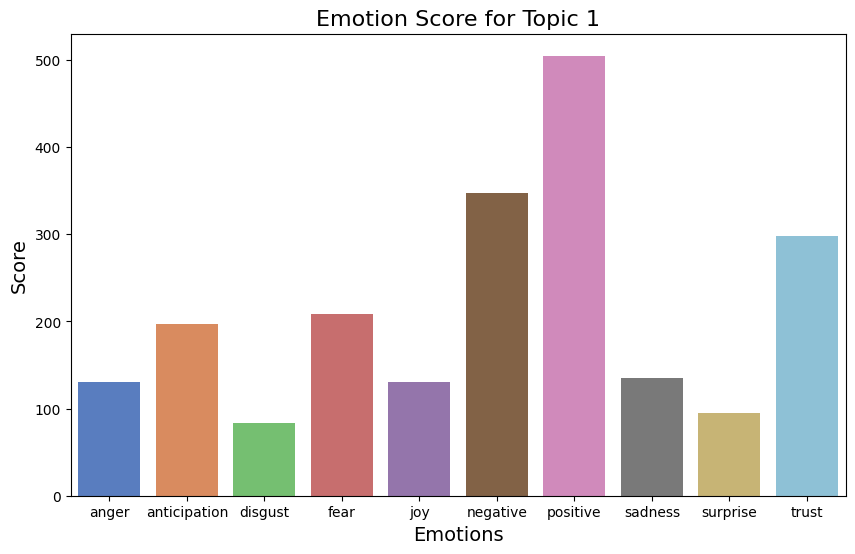

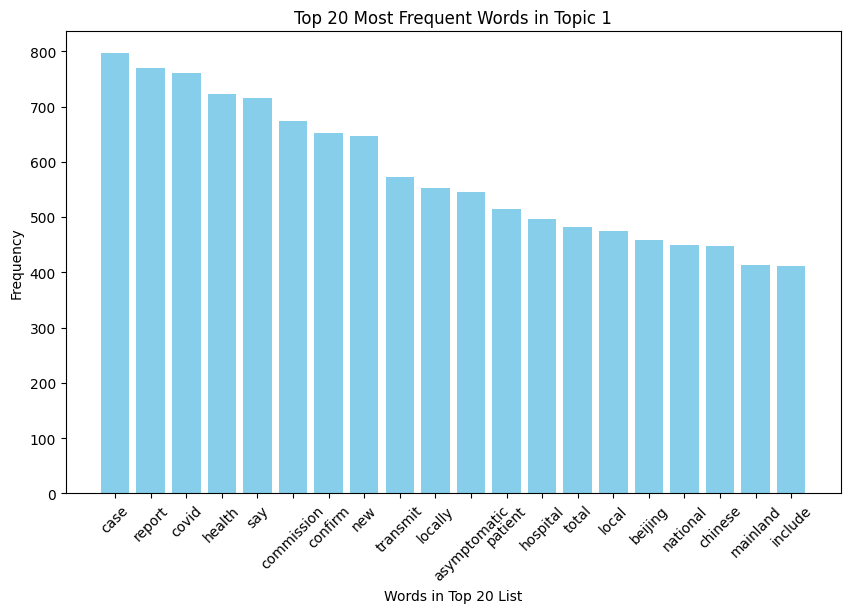

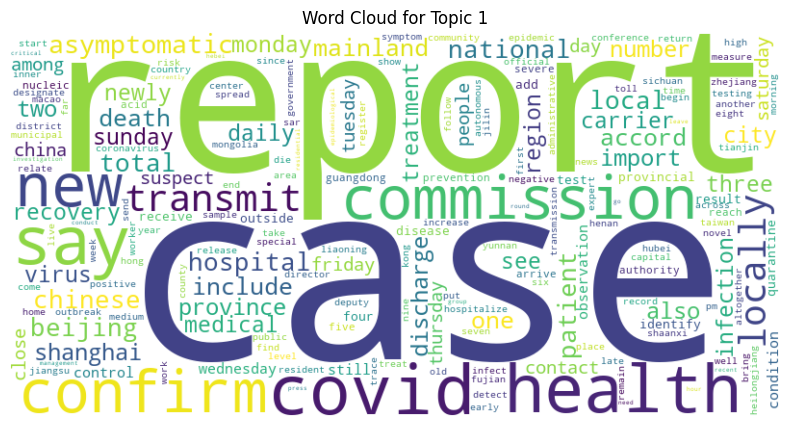



Topics for topic index 2:
(0, '0.024*"say" + 0.012*"virus" + 0.008*"medical" + 0.008*"health" + 0.008*"wuhan" + 0.007*"hospital" + 0.007*"people" + 0.007*"report" + 0.006*"case" + 0.006*"city" + 0.006*"china" + 0.006*"also" + 0.006*"work" + 0.005*"covid" + 0.005*"outbreak"')
(1, '0.022*"say" + 0.017*"medical" + 0.016*"hospital" + 0.015*"patient" + 0.009*"covid" + 0.009*"health" + 0.009*"case" + 0.008*"people" + 0.008*"wuhan" + 0.007*"china" + 0.006*"infection" + 0.006*"hubei" + 0.006*"disease" + 0.006*"control" + 0.006*"virus"')
(2, '0.024*"say" + 0.015*"case" + 0.011*"beijing" + 0.011*"health" + 0.010*"china" + 0.009*"outbreak" + 0.009*"city" + 0.009*"report" + 0.008*"covid" + 0.007*"epidemic" + 0.007*"control" + 0.007*"measure" + 0.007*"coronavirus" + 0.006*"prevention" + 0.006*"confirm"')
(3, '0.022*"say" + 0.016*"vaccine" + 0.011*"china" + 0.010*"virus" + 0.008*"covid" + 0.006*"also" + 0.006*"people" + 0.006*"disease" + 0.006*"control" + 0.006*"center" + 0.005*"shanghai" + 0.005*

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3673225799.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


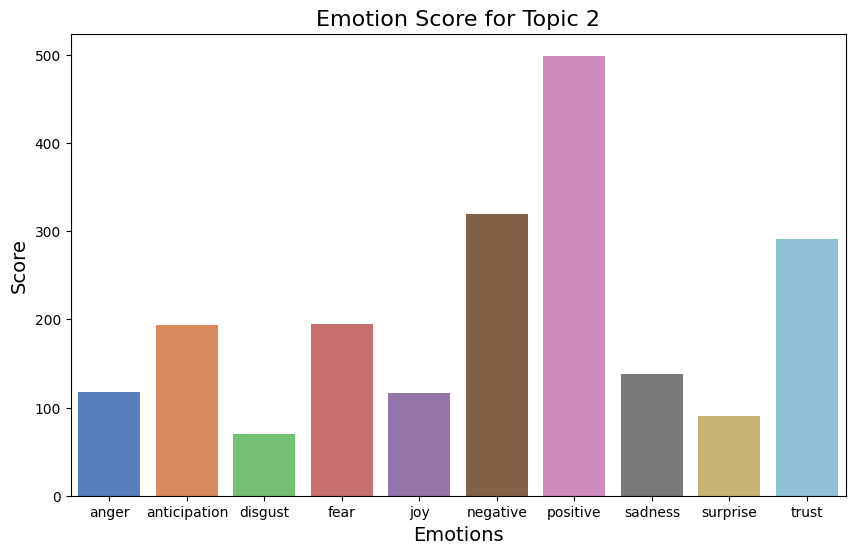

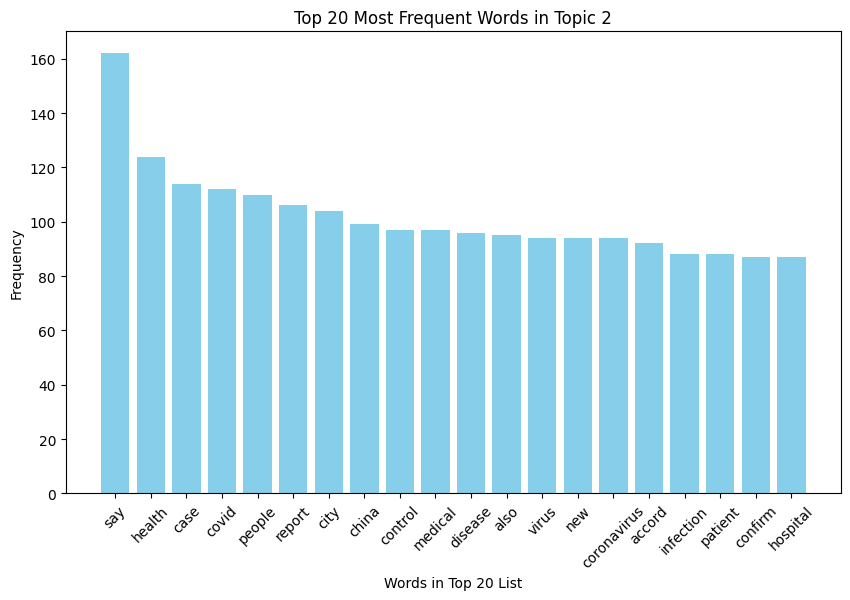

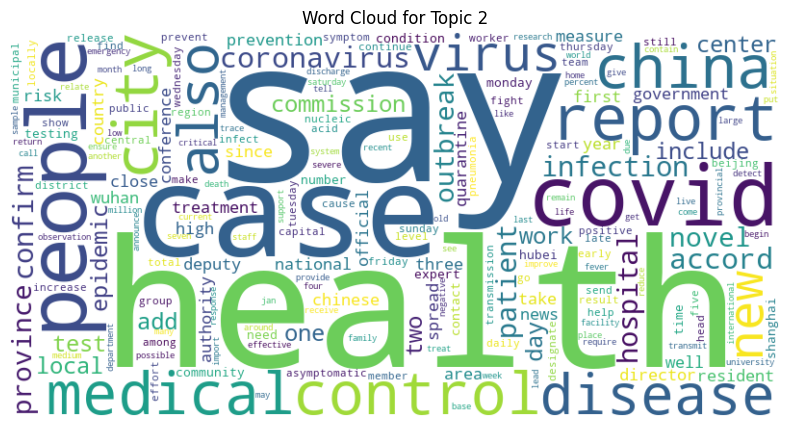



Topics for topic index 3:
(0, '0.023*"say" + 0.012*"covid" + 0.010*"health" + 0.010*"china" + 0.010*"control" + 0.009*"measure" + 0.009*"city" + 0.009*"medical" + 0.007*"prevention" + 0.006*"local" + 0.006*"case" + 0.006*"new" + 0.005*"quarantine" + 0.005*"outbreak" + 0.005*"province"')
(1, '0.027*"say" + 0.013*"vaccination" + 0.012*"covid" + 0.012*"people" + 0.011*"vaccine" + 0.009*"china" + 0.008*"disease" + 0.008*"control" + 0.008*"health" + 0.006*"elderly" + 0.006*"risk" + 0.006*"percent" + 0.005*"prevention" + 0.005*"also" + 0.005*"accord"')
(2, '0.017*"case" + 0.012*"report" + 0.012*"say" + 0.012*"covid" + 0.009*"vaccination" + 0.009*"health" + 0.008*"new" + 0.008*"commission" + 0.008*"medical" + 0.007*"province" + 0.007*"beijing" + 0.006*"prevention" + 0.006*"thursday" + 0.006*"city" + 0.006*"accord"')
(3, '0.019*"say" + 0.019*"china" + 0.013*"covid" + 0.011*"virus" + 0.008*"people" + 0.008*"chinese" + 0.007*"research" + 0.006*"expert" + 0.006*"case" + 0.005*"health" + 0.005*"

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3673225799.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


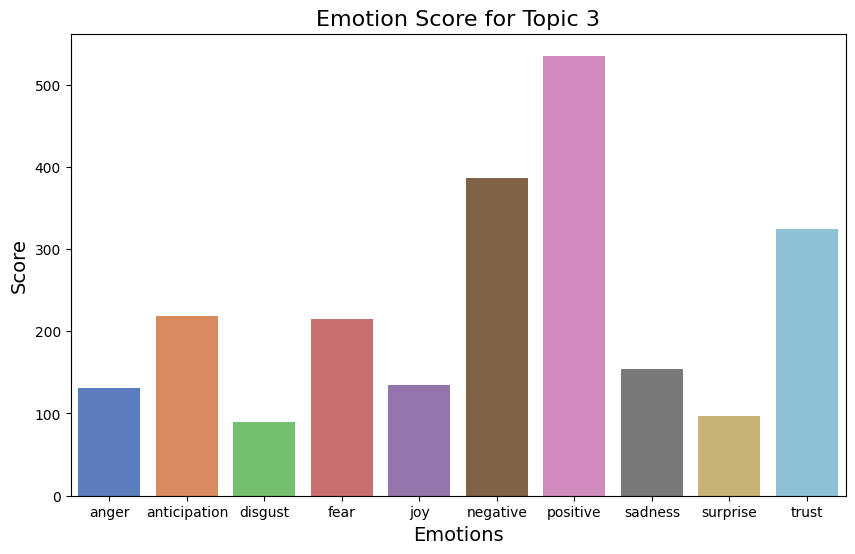

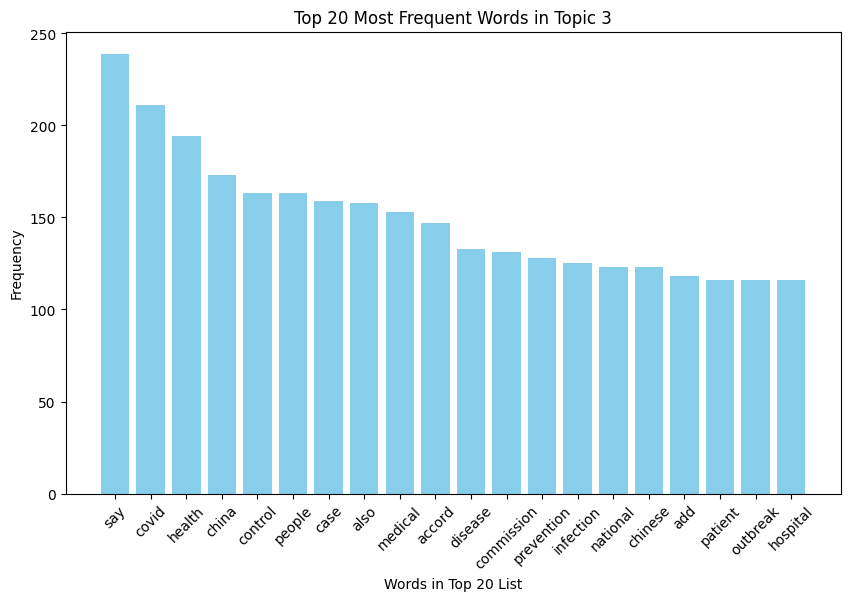

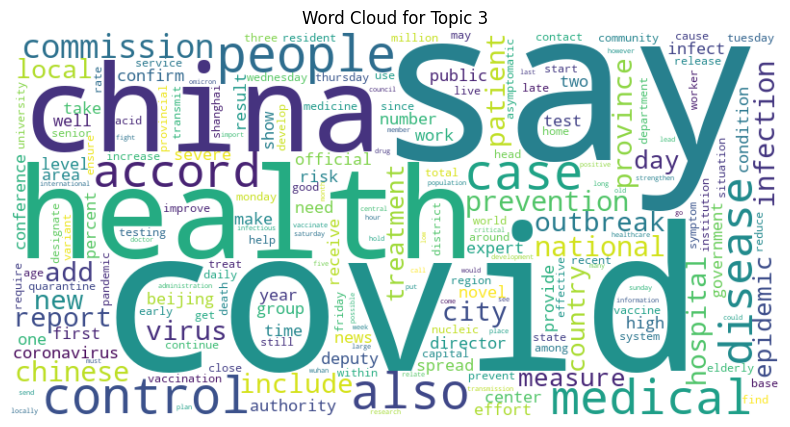



Topics for topic index 4:
(0, '0.024*"say" + 0.014*"hospital" + 0.013*"patient" + 0.011*"china" + 0.010*"medical" + 0.010*"covid" + 0.009*"health" + 0.007*"disease" + 0.007*"control" + 0.007*"case" + 0.006*"vaccine" + 0.006*"people" + 0.006*"virus" + 0.006*"chinese" + 0.005*"coronavirus"')
(1, '0.018*"say" + 0.015*"city" + 0.010*"people" + 0.009*"testing" + 0.009*"covid" + 0.007*"test" + 0.007*"resident" + 0.007*"case" + 0.007*"government" + 0.006*"medical" + 0.006*"hospital" + 0.006*"shanghai" + 0.006*"hong" + 0.006*"nucleic" + 0.006*"acid"')
(2, '0.017*"testing" + 0.016*"hospital" + 0.015*"say" + 0.014*"city" + 0.010*"test" + 0.010*"case" + 0.009*"covid" + 0.009*"district" + 0.009*"health" + 0.009*"nucleic" + 0.009*"acid" + 0.007*"report" + 0.007*"accord" + 0.007*"patient" + 0.006*"asymptomatic"')
(3, '0.015*"medical" + 0.014*"test" + 0.012*"say" + 0.012*"acid" + 0.012*"nucleic" + 0.011*"covid" + 0.010*"hospital" + 0.007*"people" + 0.007*"public" + 0.007*"patient" + 0.007*"area" + 

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3673225799.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


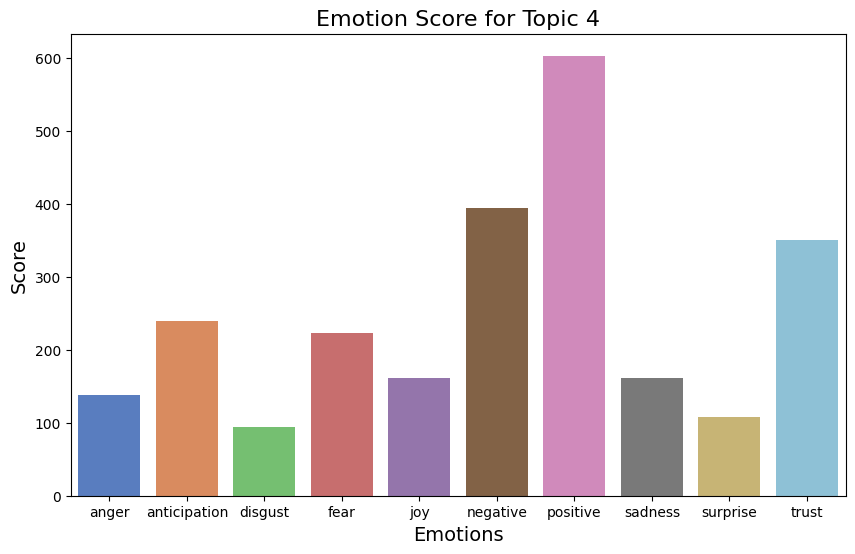

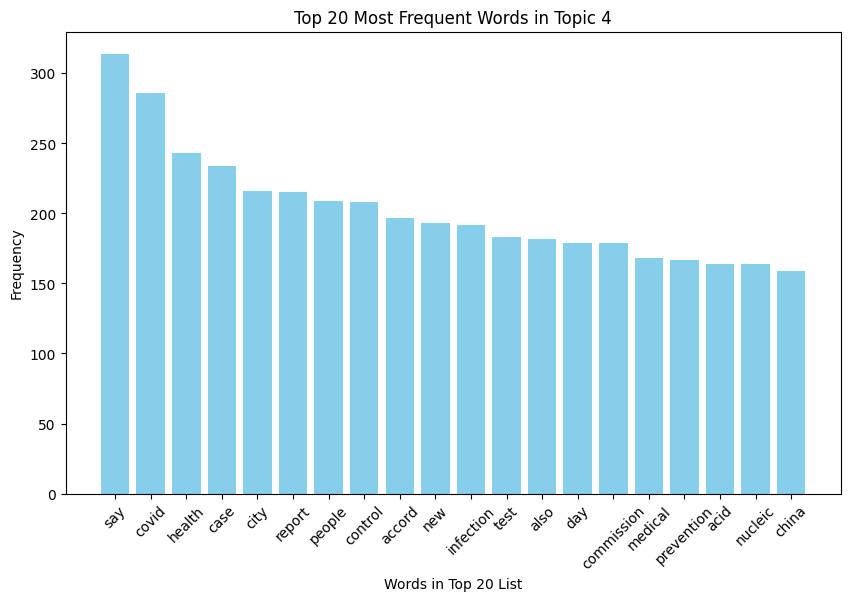

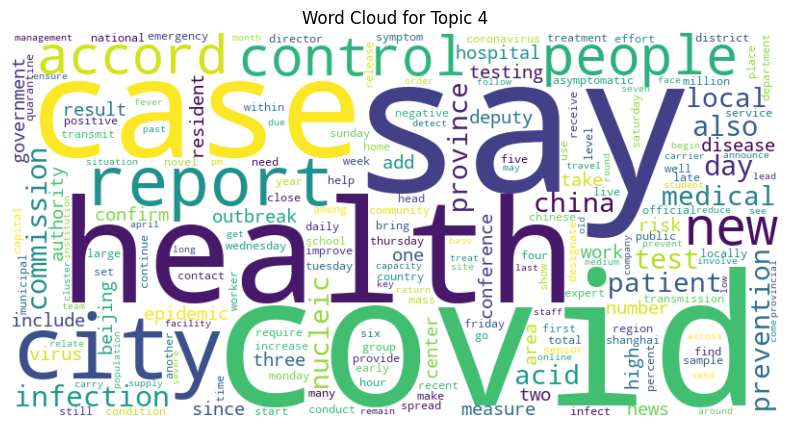



Topics for topic index 5:
(0, '0.021*"say" + 0.017*"vaccine" + 0.016*"virus" + 0.015*"china" + 0.010*"chinese" + 0.009*"coronavirus" + 0.009*"research" + 0.009*"drug" + 0.008*"trial" + 0.008*"patient" + 0.008*"covid" + 0.007*"novel" + 0.007*"expert" + 0.006*"clinical" + 0.006*"scientist"')
(1, '0.021*"say" + 0.020*"tcm" + 0.015*"patient" + 0.013*"covid" + 0.013*"medicine" + 0.012*"treatment" + 0.011*"hospital" + 0.009*"chinese" + 0.009*"medical" + 0.009*"disease" + 0.007*"use" + 0.007*"china" + 0.006*"traditional" + 0.006*"symptom" + 0.006*"also"')
(2, '0.024*"say" + 0.018*"medical" + 0.016*"china" + 0.008*"country" + 0.007*"chinese" + 0.006*"hospital" + 0.006*"covid" + 0.006*"work" + 0.006*"also" + 0.006*"outbreak" + 0.005*"epidemic" + 0.005*"people" + 0.005*"health" + 0.005*"province" + 0.005*"help"')
(3, '0.015*"city" + 0.014*"kong" + 0.014*"hong" + 0.013*"say" + 0.012*"medical" + 0.009*"government" + 0.009*"covid" + 0.008*"case" + 0.008*"mainland" + 0.008*"hospital" + 0.007*"pati

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3673225799.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


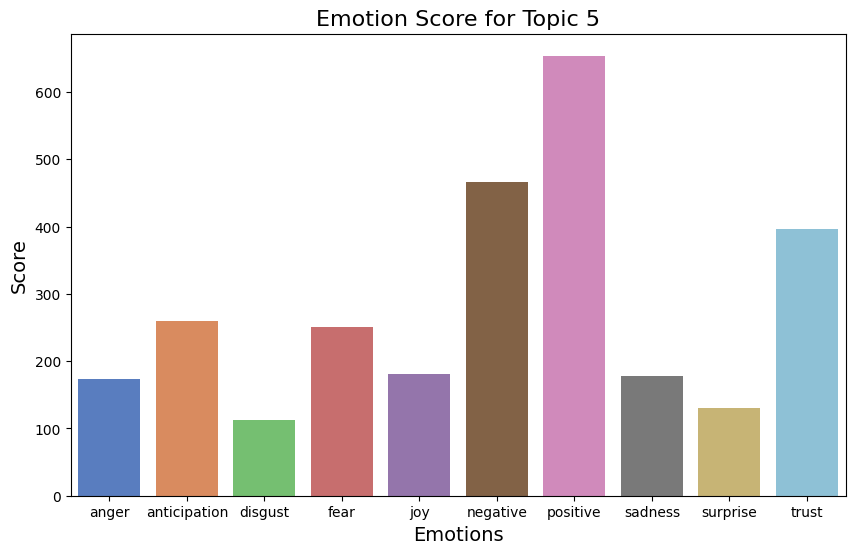

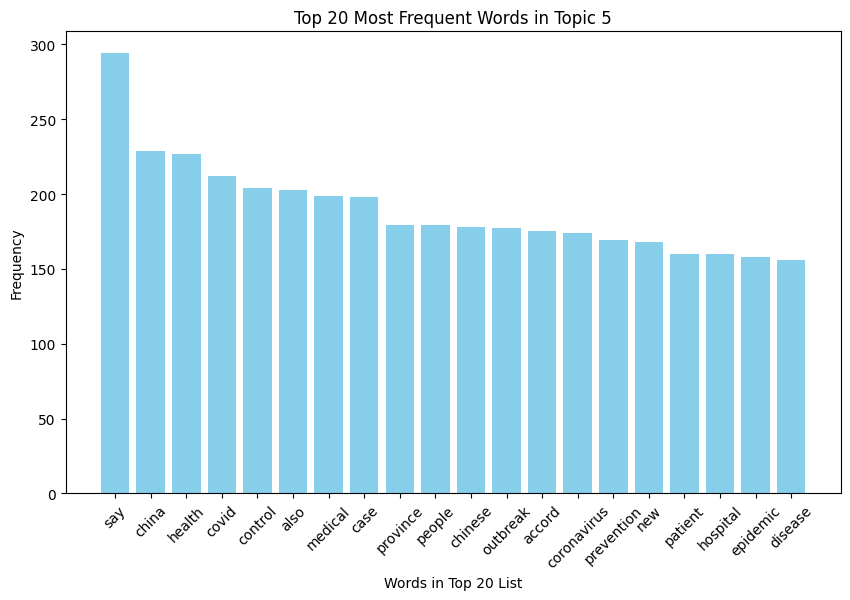

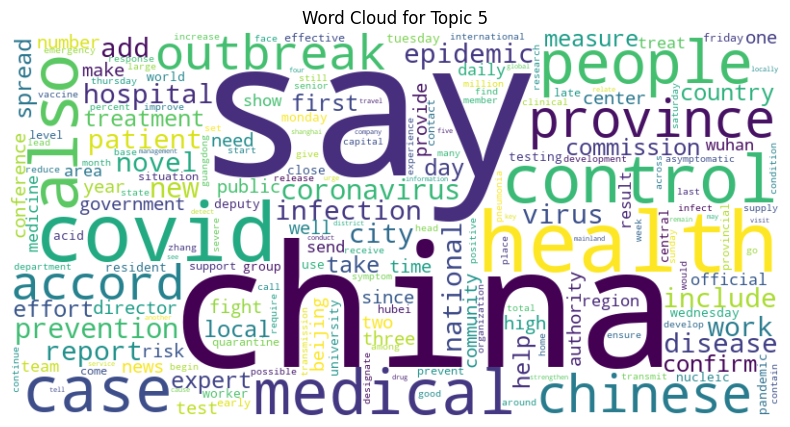



Topics for topic index 6:
(0, '0.015*"say" + 0.015*"covid" + 0.012*"patient" + 0.012*"city" + 0.011*"test" + 0.011*"case" + 0.011*"hospital" + 0.010*"health" + 0.009*"people" + 0.009*"local" + 0.008*"medical" + 0.008*"infection" + 0.008*"testing" + 0.007*"report" + 0.007*"area"')
(1, '0.024*"say" + 0.021*"hospital" + 0.016*"patient" + 0.016*"covid" + 0.014*"vaccine" + 0.010*"beijing" + 0.009*"health" + 0.008*"china" + 0.008*"medical" + 0.007*"discharge" + 0.007*"people" + 0.007*"commission" + 0.007*"chinese" + 0.007*"report" + 0.007*"total"')
(2, '0.027*"say" + 0.020*"hospital" + 0.010*"medical" + 0.010*"health" + 0.009*"case" + 0.009*"china" + 0.009*"patient" + 0.009*"covid" + 0.009*"control" + 0.007*"infection" + 0.007*"outbreak" + 0.006*"people" + 0.006*"also" + 0.006*"shanghai" + 0.006*"public"')
(3, '0.024*"say" + 0.017*"disease" + 0.013*"health" + 0.012*"china" + 0.009*"covid" + 0.009*"medical" + 0.008*"people" + 0.007*"chinese" + 0.007*"patient" + 0.007*"year" + 0.006*"control

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3673225799.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


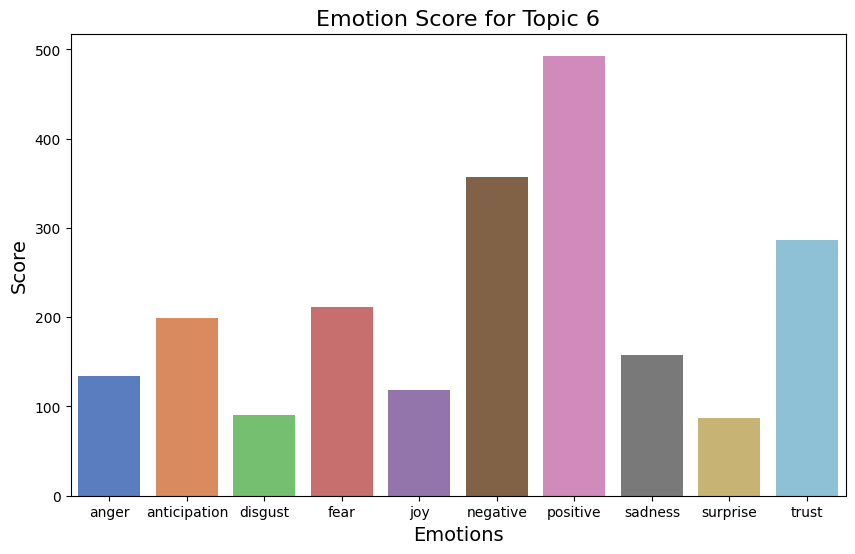

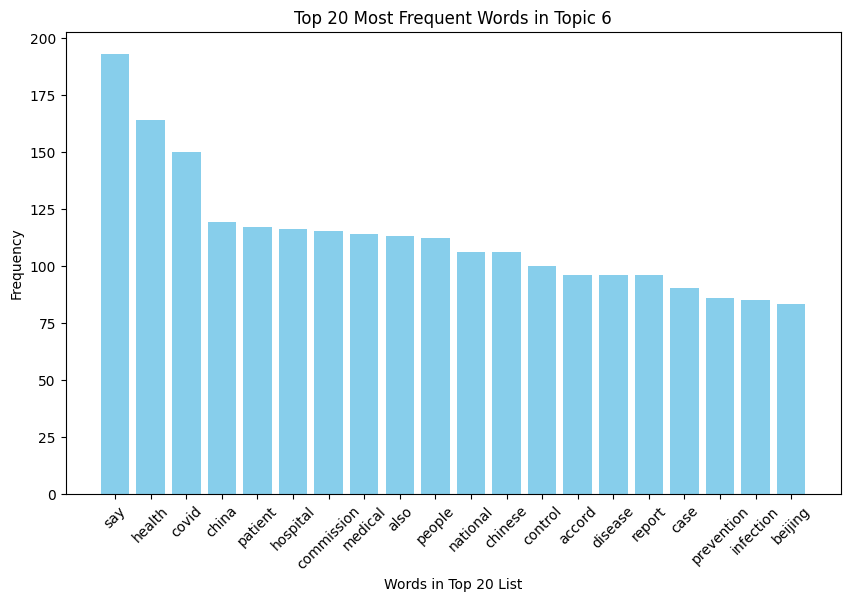

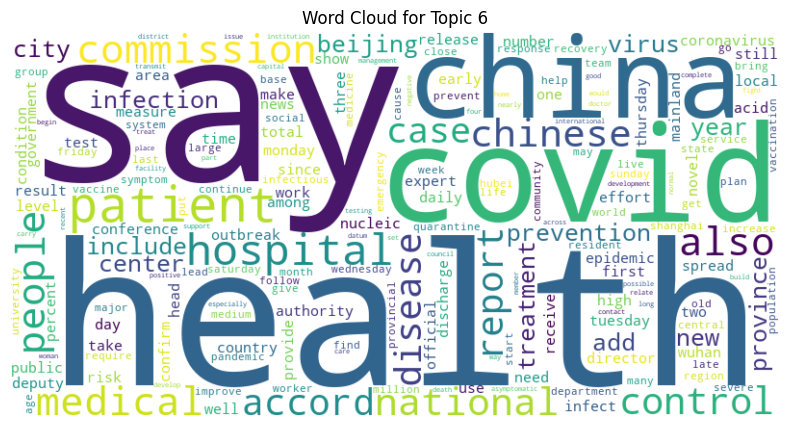



Topics for topic index 7:
(0, '0.020*"case" + 0.015*"shanghai" + 0.015*"say" + 0.012*"covid" + 0.011*"health" + 0.011*"test" + 0.010*"report" + 0.009*"city" + 0.009*"people" + 0.008*"province" + 0.008*"commission" + 0.008*"china" + 0.006*"hospital" + 0.006*"confirm" + 0.006*"medical"')
(1, '0.014*"say" + 0.010*"hospital" + 0.010*"virus" + 0.009*"patient" + 0.009*"test" + 0.009*"china" + 0.008*"coronavirus" + 0.008*"medical" + 0.008*"area" + 0.007*"local" + 0.007*"also" + 0.006*"city" + 0.006*"new" + 0.006*"case" + 0.005*"risk"')
(2, '0.020*"say" + 0.020*"case" + 0.017*"city" + 0.016*"covid" + 0.012*"report" + 0.010*"control" + 0.010*"area" + 0.010*"confirm" + 0.010*"risk" + 0.009*"people" + 0.009*"district" + 0.009*"health" + 0.009*"test" + 0.008*"province" + 0.008*"new"')
(3, '0.029*"say" + 0.015*"covid" + 0.013*"vaccine" + 0.011*"people" + 0.009*"china" + 0.008*"virus" + 0.008*"disease" + 0.007*"health" + 0.006*"chinese" + 0.006*"coronavirus" + 0.006*"novel" + 0.006*"expert" + 0.00

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3673225799.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


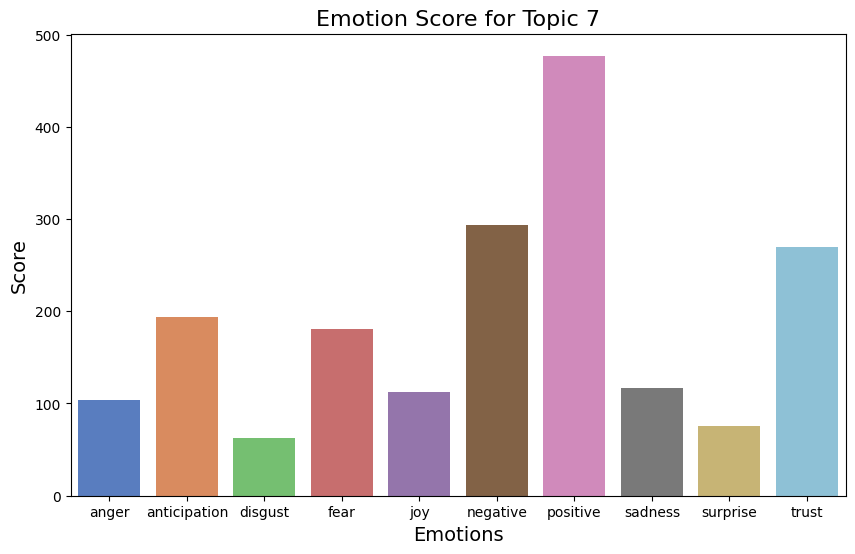

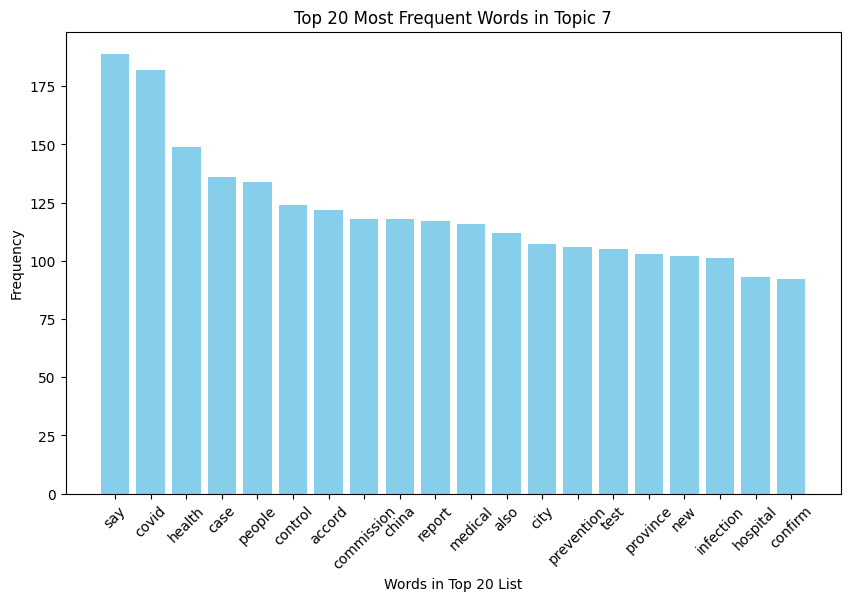

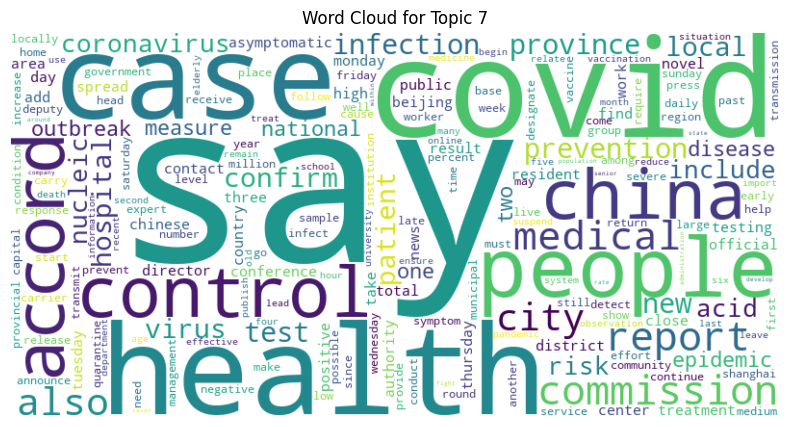



Topics for topic index 8:
(0, '0.023*"say" + 0.022*"vaccine" + 0.022*"china" + 0.012*"covid" + 0.010*"country" + 0.009*"virus" + 0.007*"chinese" + 0.007*"health" + 0.005*"test" + 0.005*"use" + 0.005*"global" + 0.005*"make" + 0.005*"international" + 0.005*"dose" + 0.005*"research"')
(1, '0.018*"say" + 0.012*"covid" + 0.010*"people" + 0.007*"control" + 0.006*"hospital" + 0.006*"measure" + 0.006*"sun" + 0.006*"day" + 0.006*"health" + 0.006*"outbreak" + 0.006*"prevention" + 0.005*"also" + 0.005*"epidemic" + 0.005*"patient" + 0.005*"test"')
(2, '0.018*"say" + 0.013*"vaccine" + 0.009*"people" + 0.007*"china" + 0.007*"medical" + 0.007*"elderly" + 0.006*"percent" + 0.006*"senior" + 0.005*"service" + 0.005*"care" + 0.005*"also" + 0.005*"insurance" + 0.005*"hospital" + 0.005*"pandemic" + 0.004*"help"')
(3, '0.025*"say" + 0.012*"case" + 0.011*"health" + 0.010*"control" + 0.008*"outbreak" + 0.008*"infection" + 0.008*"hospital" + 0.008*"people" + 0.008*"report" + 0.008*"virus" + 0.008*"china" + 0

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3673225799.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


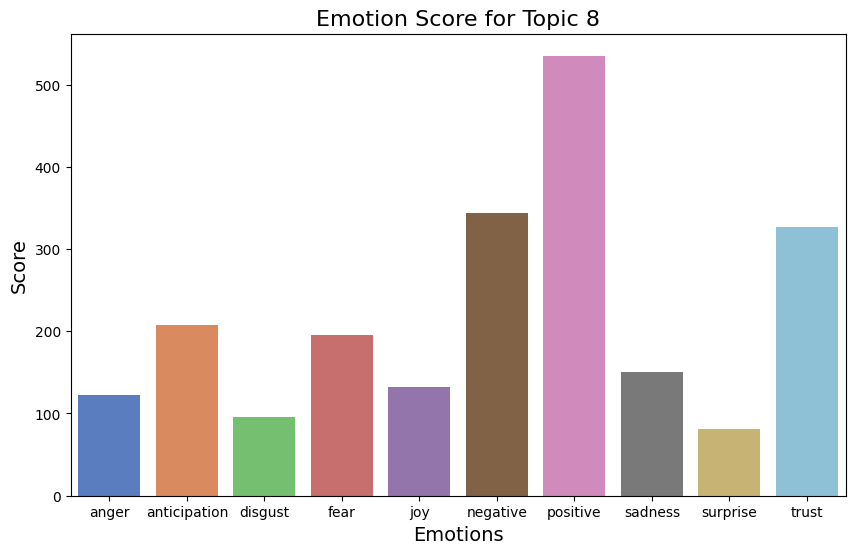

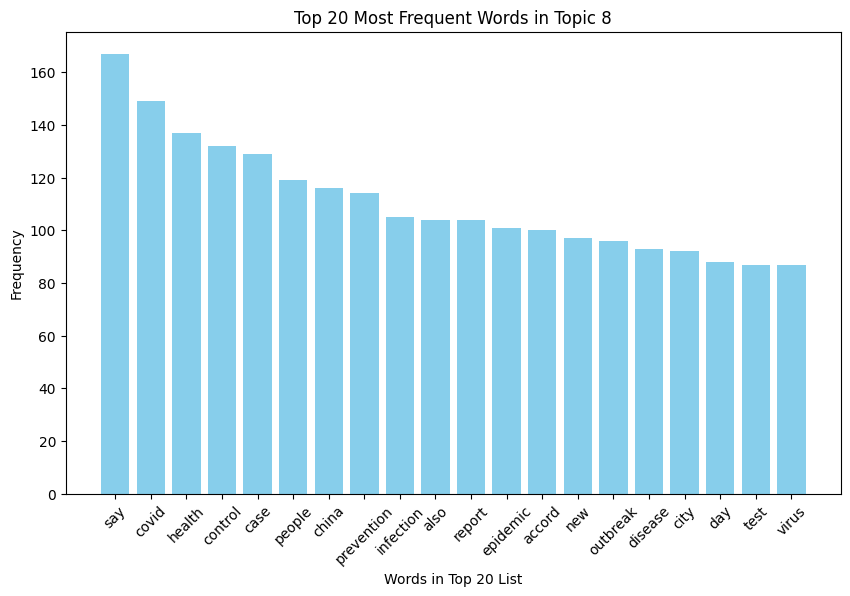

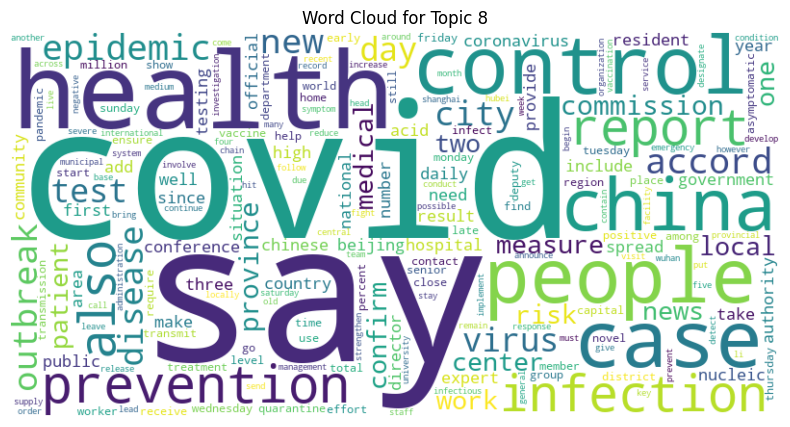



Topics for topic index 9:
(0, '0.026*"say" + 0.015*"case" + 0.012*"covid" + 0.010*"vaccination" + 0.009*"china" + 0.008*"variant" + 0.008*"people" + 0.008*"health" + 0.008*"vaccine" + 0.007*"disease" + 0.007*"flu" + 0.006*"control" + 0.006*"report" + 0.006*"virus" + 0.006*"delta"')
(1, '0.022*"say" + 0.020*"case" + 0.013*"city" + 0.011*"report" + 0.010*"covid" + 0.009*"province" + 0.009*"confirm" + 0.009*"control" + 0.009*"health" + 0.008*"patient" + 0.008*"new" + 0.007*"outbreak" + 0.007*"people" + 0.006*"test" + 0.006*"prevention"')
(2, '0.017*"say" + 0.011*"city" + 0.009*"strain" + 0.009*"year" + 0.009*"china" + 0.008*"virus" + 0.007*"people" + 0.007*"vaccine" + 0.007*"get" + 0.006*"flu" + 0.006*"wuhan" + 0.006*"cruise" + 0.006*"sister" + 0.005*"two" + 0.005*"coronavirus"')
(3, '0.026*"say" + 0.015*"vaccine" + 0.012*"china" + 0.009*"people" + 0.007*"virus" + 0.006*"covid" + 0.005*"medical" + 0.005*"control" + 0.005*"health" + 0.005*"food" + 0.005*"also" + 0.005*"country" + 0.005*"

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3673225799.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


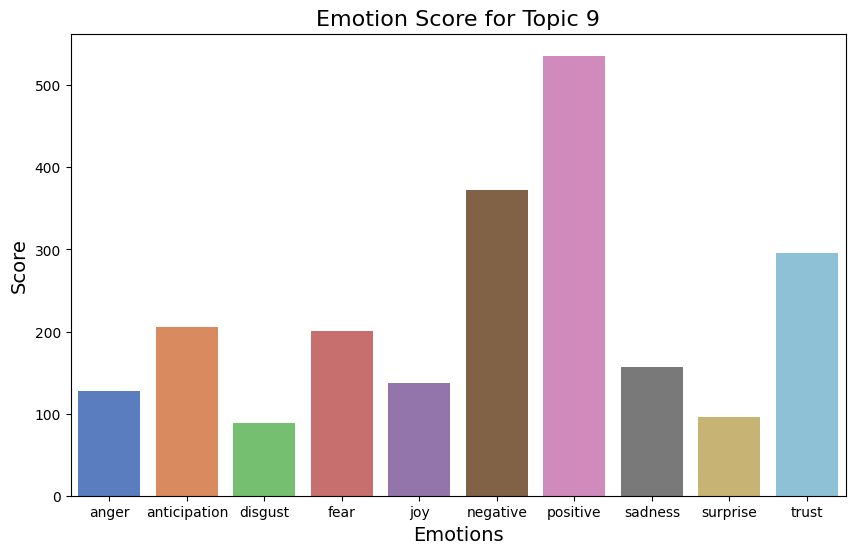

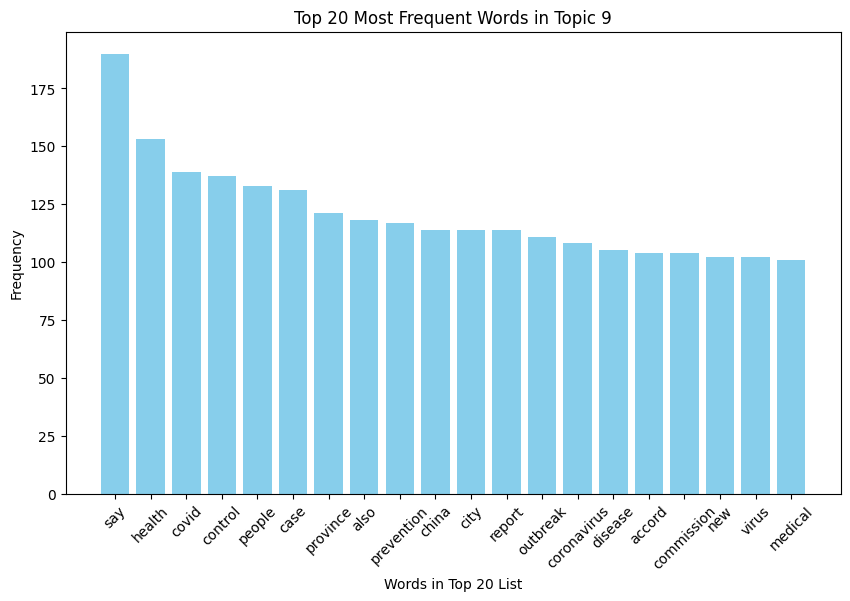

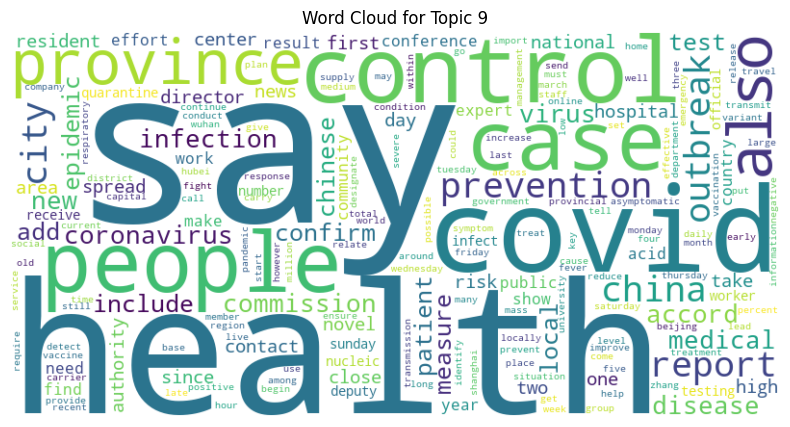



Topics for topic index 10:
(0, '0.019*"say" + 0.010*"covid" + 0.009*"virus" + 0.007*"city" + 0.006*"mask" + 0.006*"acid" + 0.006*"accord" + 0.006*"lab" + 0.006*"nucleic" + 0.006*"researcher" + 0.005*"use" + 0.005*"study" + 0.005*"institute" + 0.005*"testing" + 0.005*"control"')
(1, '0.042*"vaccine" + 0.024*"say" + 0.016*"covid" + 0.015*"china" + 0.011*"trial" + 0.008*"clinical" + 0.007*"dose" + 0.007*"chinese" + 0.007*"use" + 0.007*"people" + 0.006*"country" + 0.006*"health" + 0.006*"vaccination" + 0.006*"medical" + 0.005*"develop"')
(2, '0.014*"passenger" + 0.013*"airport" + 0.011*"say" + 0.010*"flight" + 0.010*"transfer" + 0.010*"station" + 0.008*"travel" + 0.008*"test" + 0.008*"driver" + 0.008*"day" + 0.007*"truck" + 0.007*"require" + 0.006*"city" + 0.006*"wuhan" + 0.006*"international"')
(3, '0.019*"say" + 0.013*"vaccine" + 0.008*"covid" + 0.008*"china" + 0.008*"health" + 0.007*"country" + 0.007*"percent" + 0.007*"control" + 0.007*"disease" + 0.006*"chinese" + 0.006*"hpv" + 0.006

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3673225799.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


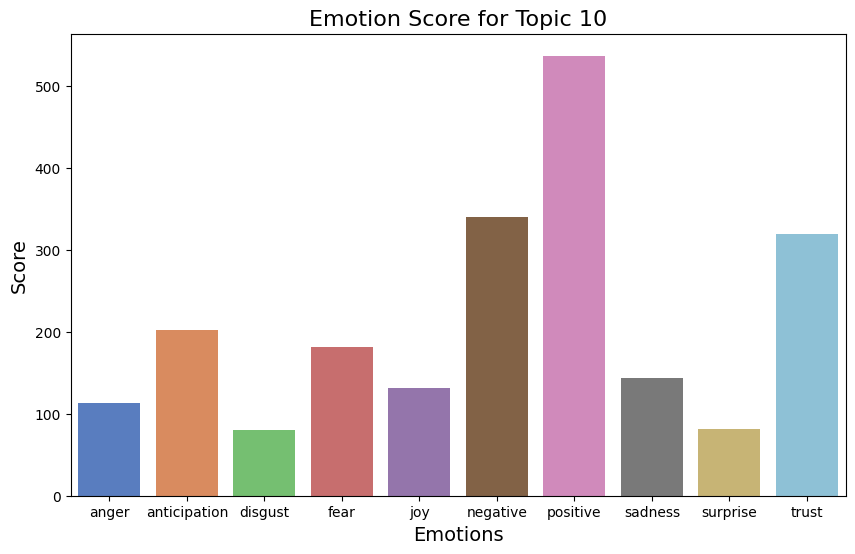

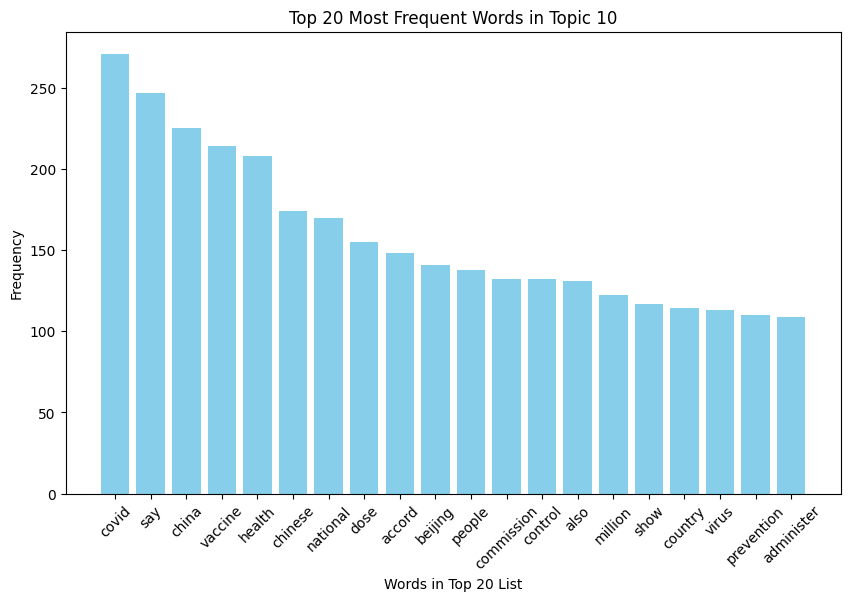

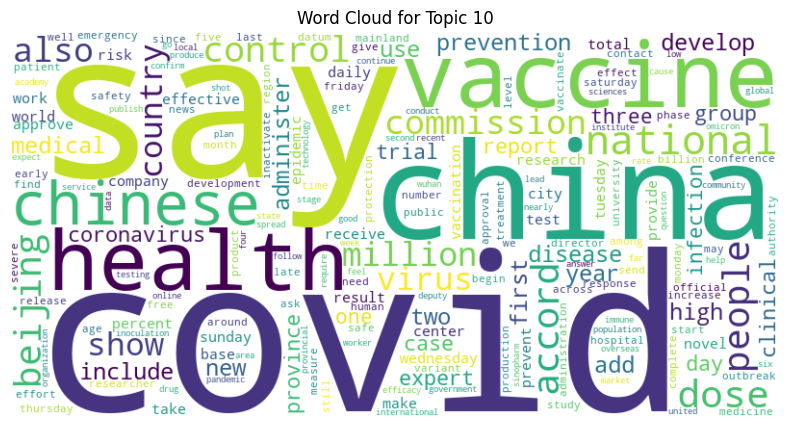

In [77]:
indices=[1,2,3,4,5,6,7,8,9,10]
selected_topics=[chn_topic[i] for i in indices]

# Initialize the pipeline with the selected topics
pipeline=TextAnalysisPipeline(topic_dataframes=selected_topics, n_topics=5)

# Display topics, emotional analysis and word frequency for each selected topic
for i, topic_idx in enumerate(indices):
    pipeline.display_topics(topic_idx=i, num_words=15)
    emotion_scores=pipeline.emotional_analysis(topic_idx=i)
    freq_df=pipeline.word_frequency_analysis(topic_idx=i)
    pipeline.generate_wordcloud(topic_idx=i)
    print("\n")

In [51]:
chn_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3129 entries, 0 to 3510
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               3129 non-null   object        
 1   Link                3129 non-null   object        
 2   Date                3129 non-null   object        
 3   Content             3128 non-null   object        
 4   Yearmonth           3129 non-null   datetime64[ns]
 5   title_token         3129 non-null   object        
 6   content_token       3129 non-null   object        
 7   Topic               3129 non-null   int64         
 8   Topic_Prob          3129 non-null   float32       
 9   topic_distribution  3129 non-null   object        
 10  Topic_0             3129 non-null   float32       
 11  Topic_1             3129 non-null   float32       
 12  Topic_2             3129 non-null   float32       
 13  Topic_3             3129 non-null   float32       
 1

In [55]:
def calculate_emotion_scores(title_tokens):
    emotion_scores=defaultdict(int)
    for token in title_tokens:
        if token in emotion_dict:
            for emotion in emotion_dict[token]:
                emotion_scores[emotion] += emotion_dict[token][emotion]
    return emotion_scores

chn_1['emotion_scores']=chn_1['title_token'].apply(calculate_emotion_scores)

monthly_emotions=defaultdict(lambda: defaultdict(int))


for index, row in chn_1.iterrows():
    Yearmonth=row['Yearmonth']
    emotions=row['emotion_scores']
    for emotion, score in emotions.items():
        monthly_emotions[Yearmonth][emotion] += score

monthly_emotions_df=pd.DataFrame(monthly_emotions).T.reset_index().rename(columns={'index': 'Yearmonth'})
monthly_emotions_df=monthly_emotions_df.melt(id_vars=['Yearmonth'], var_name='Emotion', value_name='Score')

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/2657181776.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chn_1['emotion_scores']=chn_1['title_token'].apply(calculate_emotion_scores)


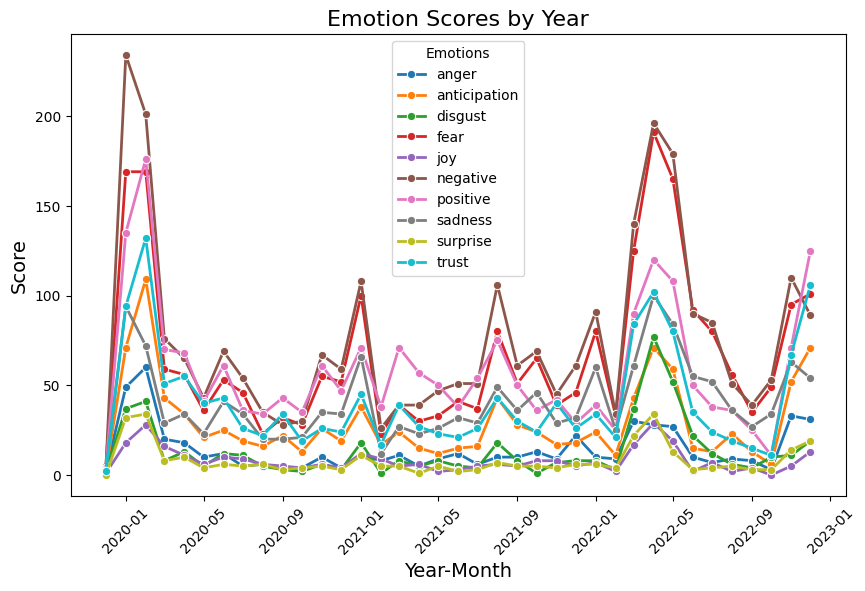

In [62]:
# lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Yearmonth', y='Score', hue='Emotion', data=monthly_emotions_df, marker='o', linewidth=2)
plt.xticks(fontsize=10, rotation=45)  # Adjust fontsize as needed (e.g., 10)
plt.title('Emotion Scores by Year', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Emotions')
plt.show()

{'anger': 353, 'anticipation': 409, 'disgust': 259, 'fear': 475, 'joy': 302, 'negative': 962, 'positive': 1067, 'sadness': 384, 'surprise': 226, 'trust': 609}


/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/3173442516.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions',y='Score', data=content_emo,palette="muted")


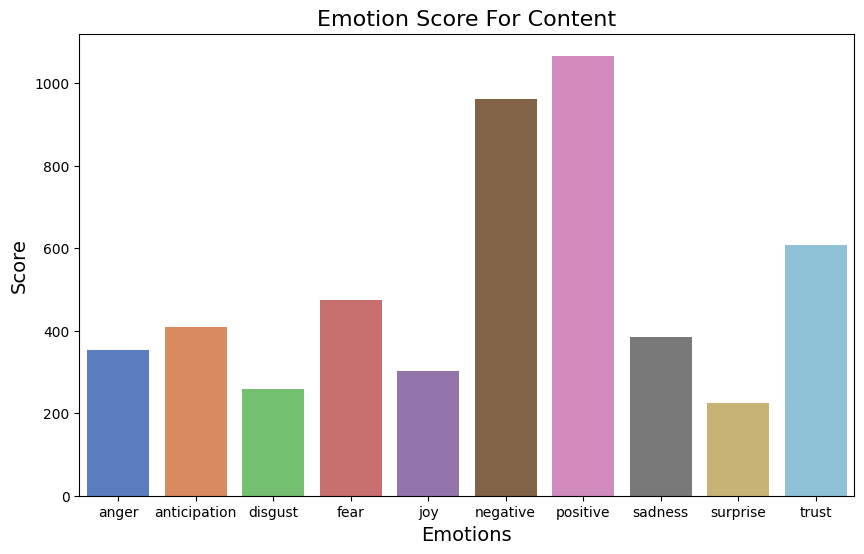

In [75]:
# for content
content_dict=corpora.Dictionary(chn_1['content_token'])
content_words = [content_dict[id] for id in content_dict.keys()]

cont_emotion_dict=defaultdict(lambda: defaultdict(int))
for i, row in nrc_lexicon.iterrows():
    cont_emotion_dict[row['word']][row['emotion']] = int(row['association'])
cont_emotion_scores=defaultdict(int)
for word in content_words:
    for emotion in cont_emotion_dict[word]:
        cont_emotion_scores[emotion]+=cont_emotion_dict[word][emotion]
print(dict(cont_emotion_scores))

content_emo=pd.DataFrame(list(cont_emotion_scores.items()),columns=['Emotions','Score'])


plt.figure(figsize=(10,6))
sns.barplot(x='Emotions',y='Score', data=content_emo,palette="muted")
plt.title('Emotion Score For Content', fontsize=16)
plt.xlabel('Emotions',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.show()


In [67]:
def calculate_emotion_scores(content_token):
    cont_emotion_scores=defaultdict(int)
    for token in content_token:
        if token in cont_emotion_dict:
            for emotion in cont_emotion_dict[token]:
                cont_emotion_scores[emotion] += cont_emotion_dict[token][emotion]
    return cont_emotion_scores

chn_1['cont_emotion_scores']=chn_1['content_token'].apply(calculate_emotion_scores)

cont_monthly_emotions=defaultdict(lambda: defaultdict(int))


for index, row in chn_1.iterrows():
    Yearmonth=row['Yearmonth']
    emotions=row['cont_emotion_scores']
    for emotion, score in emotions.items():
        cont_monthly_emotions[Yearmonth][emotion] += score

cont_monthly_emotions_df=pd.DataFrame(cont_monthly_emotions).T.reset_index().rename(columns={'index': 'Yearmonth'})
cont_monthly_emotions_df=cont_monthly_emotions_df.melt(id_vars=['Yearmonth'], var_name='Emotion', value_name='Score')

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_27870/4152114830.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chn_1['cont_emotion_scores']=chn_1['content_token'].apply(calculate_emotion_scores)


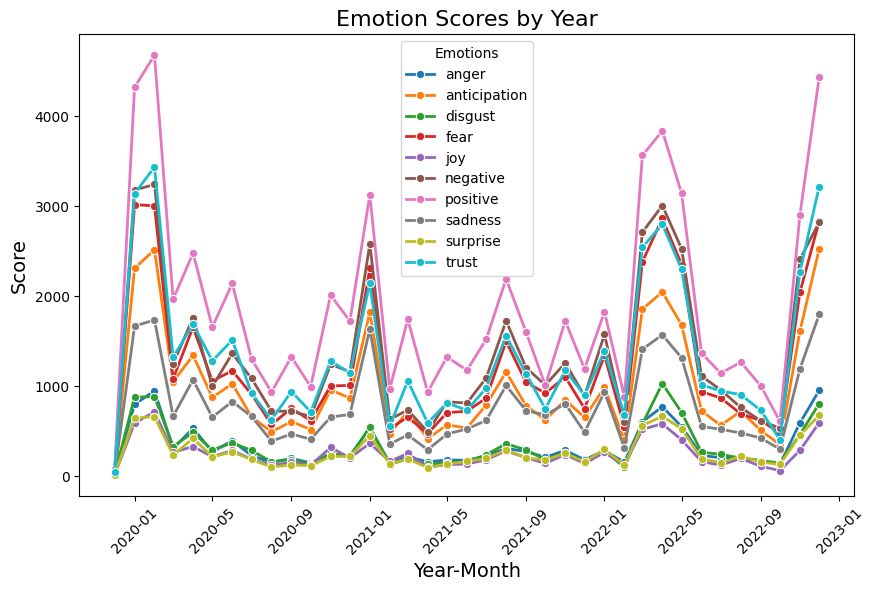

In [68]:
# lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Yearmonth', y='Score', hue='Emotion', data=cont_monthly_emotions_df, marker='o', linewidth=2)
plt.xticks(fontsize=10, rotation=45)  # Adjust fontsize as needed (e.g., 10)
plt.title('Emotion Scores by Year', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Emotions')
plt.show()

In [69]:
cont_corpus=[content_dict.doc2bow(text) for text in chn_1['content_token']]
word_freq1=content_dict.dfs
freq_chn_total=[(content_dict[id], freq) for id, freq in word_freq1.items()]
freq_chn=pd.DataFrame(freq_chn_total, columns=['Word', 'Frequency'])
freq_chn_sort=freq_chn.sort_values(by='Frequency',ascending=False)
freq_chn_20=freq_chn_sort.head(20)
freq_chn_20

Word  Frequency
4           say       2710
12        covid       2472
56       health       2322
75         case       2079
469      report       1878
68   commission       1749
174         new       1696
125      accord       1591
0         china       1581
358        also       1551
55       people       1527
231     control       1521
24      patient       1465
470     confirm       1452
61      chinese       1435
112    hospital       1434
16      medical       1416
302    province       1365
15     national       1363
297        city       1348

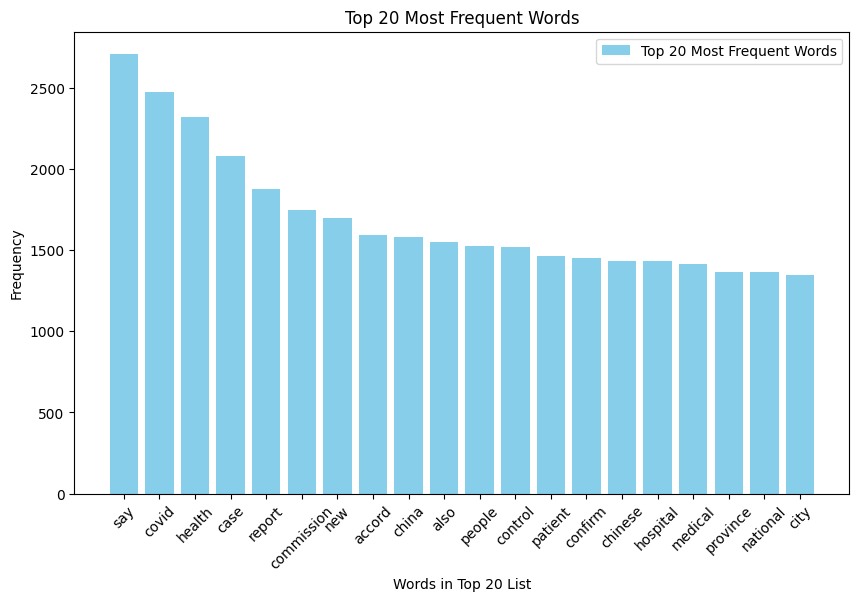

In [70]:
plt.figure(figsize=(10, 6))
plt.bar(freq_chn_20['Word'], freq_chn_20['Frequency'], color='skyblue')

# Adding labels and title
plt.xlabel("Words in Top 20 List")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words")
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.legend(["Top 20 Most Frequent Words"], loc='best')

# Display the plot
plt.show()

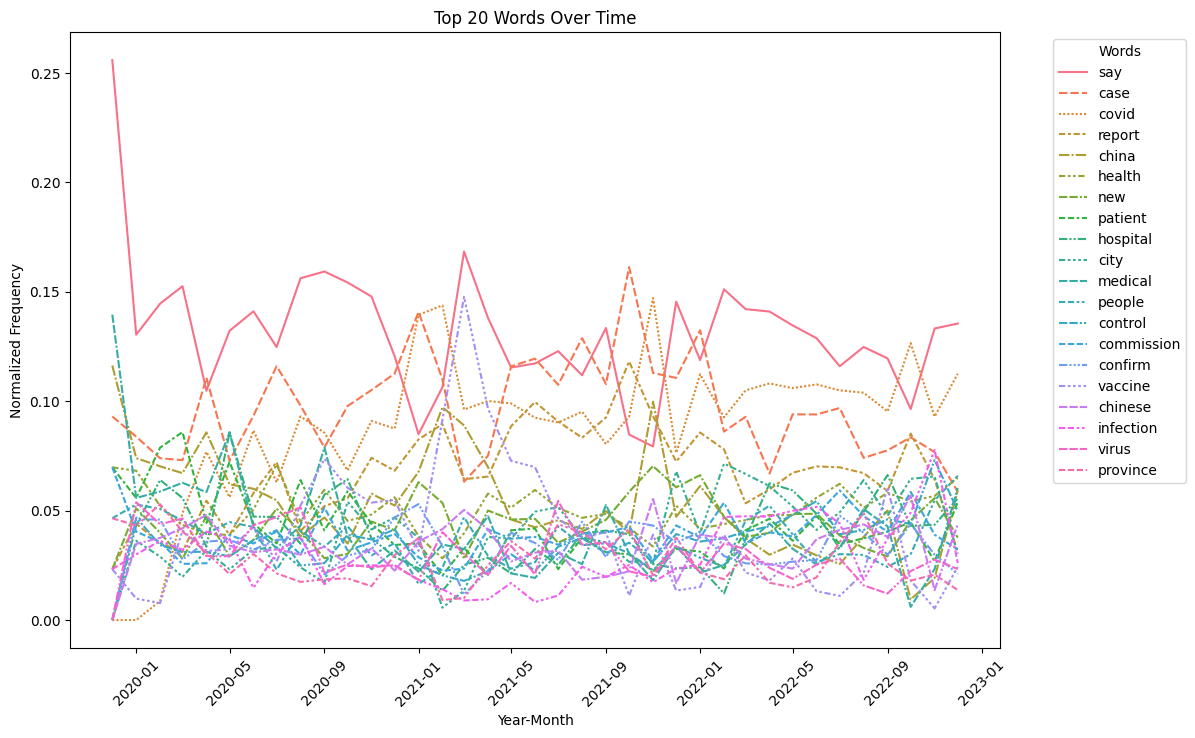

In [72]:
chn_content=chn_1.explode('content_token')
cont_token_counts=chn_content.groupby(['Yearmonth', 'content_token']).size().reset_index(name='count')
ctoken_pivot=cont_token_counts.pivot(index='Yearmonth', columns='content_token', values='count').fillna(0)
ctop_tokens=ctoken_pivot.sum().sort_values(ascending=False).head(20).index
ctoken_pivot_top=ctoken_pivot[ctop_tokens]
ctoken_pivot_top_normalized=ctoken_pivot_top.div(ctoken_pivot_top.sum(axis=1), axis=0)

# Plotting the top 20 tokens over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=ctoken_pivot_top_normalized)
plt.title('Top 20 Words Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Normalized Frequency')
plt.legend(title='Words', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

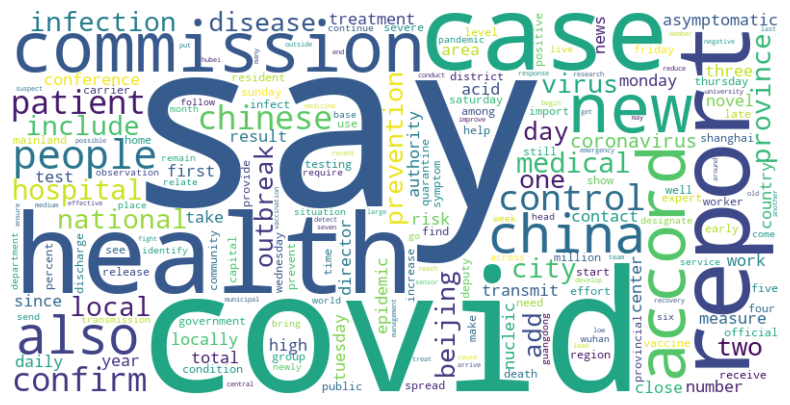

In [73]:
freq_chn_dict=pd.Series(freq_chn.Frequency.values, index=freq_chn.Word).to_dict()
# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(freq_chn_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from bertopic import BERTopic
# Initialize BERTopic with default parameters
title_topic_model=BERTopic()

# Fit the model to your text data and get topics
topics, probabilities = title_topic_model.fit_transform(title_text)

# Get the topic summary
title_topic_info = title_topic_model.get_topic_info()
print(title_topic_info.head())

: 

In [ ]:
import sys
print(sys.executable)

/Users/hy/Library/Mobile Documents/com~apple~CloudDocs/Leuven sociology/master thesis/covid/bin/python
